## Imports

In [9]:
import csv, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

## Functions

## Analysis

In [10]:
path = "../Data/data.csv"
df = pd.read_csv(path)
df = df.dropna(subset=['permissions', 'installs'])
df

title  \
0                             TikTok - Trends Start Here   
1                                    ZOOM Cloud Meetings   
2                                     WhatsApp Messenger   
3                                               Cash App   
4      Discord - Talk, Video Chat & Hang Out with Fri...   
...                                                  ...   
13163                                    Kids Trains Pro   
13164                                     Sago Mini Town   
13165                              Sago Mini Super Juice   
13166                     My Town : ICEME Amusement Park   
13167                                  Sago Mini Airport   

                                 appId  \
0             com.zhiliaoapp.musically   
1                us.zoom.videomeetings   
2                         com.whatsapp   
3                    com.squareup.cash   
4                          com.discord   
...                                ...   
13163          com.ogien.kidstrainspro   
13164     com.sagosago.Town.googleplay   
13165    com.sagosago.Juice.googleplay   
13166             mytown.amusementpark   
13167  com.sagosago.Airport.googleplay   

                                                     url          developer  \
0      https://play.google.com/store/apps/details?id=...   TikTok Pte. Ltd.   
1      https://play.google.com/store/apps/details?id=...            zoom.us   
2      https://play.google.com/store/apps/details?id=...      WhatsApp Inc.   
3      https://play.google.com/store/apps/details?id=...       Square, Inc.   
4      https://play.google.com/store/apps/details?id=...       Discord Inc.   
...                                                  ...                ...   
13163  https://play.google.com/store/apps/details?id=...         3583 Bytes   
13164  https://play.google.com/store/apps/details?id=...          Sago Mini   
13165  https://play.google.com/store/apps/details?id=...          Sago Mini   
13166  https://play.google.com/store/apps/details?id=...  My Town Games Ltd   
13167  https://play.google.com/store/apps/details?id=...          Sago Mini   

                     devID  price   free        category  \
0         TikTok+Pte.+Ltd.   0.00   True     APPLICATION   
1                  zoom.us   0.00   True     APPLICATION   
2            WhatsApp+Inc.   0.00   True     APPLICATION   
3      4878871734928263649   0.00   True     APPLICATION   
4             Discord+Inc.   0.00   True     APPLICATION   
...                    ...    ...    ...             ...   
13163  7830845280092528776   1.49  False  FAMILY_PRETEND   
13164  6600704821286067966   3.99  False  FAMILY_PRETEND   
13165  6600704821286067966   3.99  False  FAMILY_PRETEND   
13166  4907572025980617983   2.99  False  FAMILY_PRETEND   
13167  6600704821286067966   3.99  False  FAMILY_PRETEND   

                                             permissions        installs  
0      {'Device & app history': ['retrieve running ap...  1,000,000,000+  
1      {'Device ID & call information': ['read phone ...    100,000,000+  
2      {'Contacts': ['modify your contacts', 'find ac...  5,000,000,000+  
3      {'Identity': ['find accounts on the device', '...     10,000,000+  
4      {'Identity': ['find accounts on the device'], ...    100,000,000+  
...                                                  ...             ...  
13163                 {'Other': ['full network access']}            500+  
13164  {'Photos/Media/Files': ['read the contents of ...         10,000+  
13165  {'Wi-Fi connection information': ['view Wi-Fi ...          5,000+  
13166  {'Photos/Media/Files': ['read the contents of ...         10,000+  
13167  {'Wi-Fi connection information': ['view Wi-Fi ...          1,000+  

[13005 rows x 10 columns]

In [11]:
df['category'].unique()

array(['APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
       'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS',
       'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER', 'GAME',
       'GAME_ACTION', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_BOARD',
       'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL', 'GAME_EDUCATIONAL',
       'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING', 'GAME_ROLE_PLAYING',
       'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', 'GAME_TRIVIA',
       'GAME_WORD', 'FAMILY', 'FAMILY_ACTION', 'FAMILY_BRAINGAMES',
       'FAMILY_CREATE', 'FAMILY_EDUCATION', 'FAMILY_MU

In [12]:
df2 = df.groupby('category')['appId'].count()
print(len(df2.index))
remove = ['GAME_ACTION', 'GAME_ADVENTURE',\
       'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL', \
       'GAME_EDUCATIONAL', 'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING', \
       'GAME_ROLE_PLAYING', 'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', \
       'GAME_TRIVIA', 'GAME_WORD', 'FAMILY_ACTION', 'FAMILY_BRAINGAMES', 'FAMILY_CREATE', \
       'FAMILY_EDUCATION', 'FAMILY_MUSICVIDEO', 'FAMILY_PRETEND']
df = df[~df['category'].isin(remove)]
df2 = df2.drop(labels=remove)
print(len(df2.index))

59
36


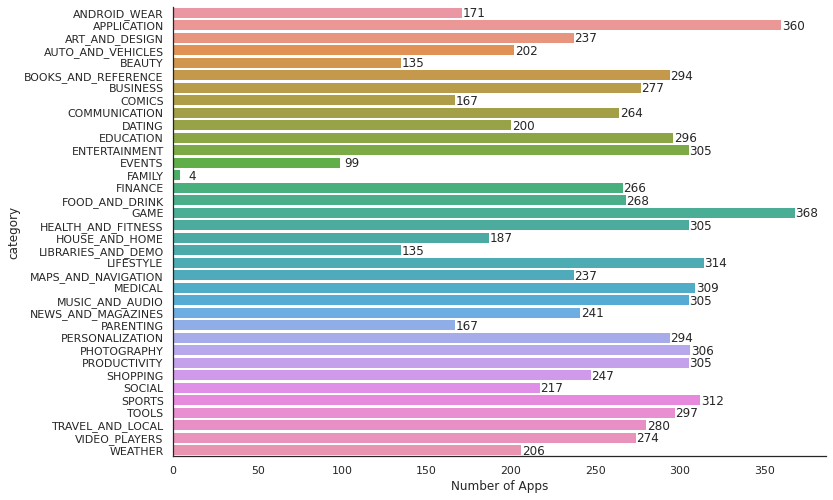

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
splot = sns.barplot(x=df2.values, y=df2.index, orient = 'h', linewidth=0)
splot.set(xlabel="Number of Apps")
sns.despine()
for p in splot.patches:
    width = p.get_width()
    plt.text(7+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.savefig('permissions_per_cat.png', bbox_inches = "tight")

In [14]:
df = df.copy()
for idx, row in df.iterrows():
    d = ast.literal_eval(row['permissions'])
    num = 0
    for key, value in d.items():
        for item in value:
            num += 1
    #row['num_permissions'] = count
    df.loc[idx, "num_permissions"] = int(num)

In [15]:
df

title  \
0                             TikTok - Trends Start Here   
1                                    ZOOM Cloud Meetings   
2                                     WhatsApp Messenger   
3                                               Cash App   
4      Discord - Talk, Video Chat & Hang Out with Fri...   
...                                                  ...   
8987                                   The Pocket Arcade   
12653                          Baby Twins - Newborn Care   
12654                           L.O.L. Surprise Ball Pop   
12655                  Baking Cupcakes 7 - Cooking Games   
12656                                  Talking Husky Dog   

                                     appId  \
0                 com.zhiliaoapp.musically   
1                    us.zoom.videomeetings   
2                             com.whatsapp   
3                        com.squareup.cash   
4                              com.discord   
...                                    ...   
8987                      com.rogue.arcade   
12653                com.tabtale.babytwins   
12654      com.mgae.comlolsurprise.ballpop   
12655  air.cellygame.cupcakescookinglesson   
12656       com.lily.times.tweenshusky.all   

                                                     url          developer  \
0      https://play.google.com/store/apps/details?id=...   TikTok Pte. Ltd.   
1      https://play.google.com/store/apps/details?id=...            zoom.us   
2      https://play.google.com/store/apps/details?id=...      WhatsApp Inc.   
3      https://play.google.com/store/apps/details?id=...       Square, Inc.   
4      https://play.google.com/store/apps/details?id=...       Discord Inc.   
...                                                  ...                ...   
8987   https://play.google.com/store/apps/details?id=...  Rogue Games, Inc.   
12653  https://play.google.com/store/apps/details?id=...            TabTale   
12654  https://play.google.com/store/apps/details?id=...  MGA Entertainment   
12655  https://play.google.com/store/apps/details?id=...          CellyGame   
12656  https://play.google.com/store/apps/details?id=...       Talking Baby   

                     devID  price   free     category  \
0         TikTok+Pte.+Ltd.   0.00   True  APPLICATION   
1                  zoom.us   0.00   True  APPLICATION   
2            WhatsApp+Inc.   0.00   True  APPLICATION   
3      4878871734928263649   0.00   True  APPLICATION   
4             Discord+Inc.   0.00   True  APPLICATION   
...                    ...    ...    ...          ...   
8987   9104457198089339529   3.99  False         GAME   
12653  5735447750101420287   0.00   True       FAMILY   
12654  7977425518165110203   0.00   True       FAMILY   
12655  8709924520757064172   0.00   True       FAMILY   
12656  5981335106476514858   0.00   True       FAMILY   

                                             permissions        installs  \
0      {'Device & app history': ['retrieve running ap...  1,000,000,000+   
1      {'Device ID & call information': ['read phone ...    100,000,000+   
2      {'Contacts': ['modify your contacts', 'find ac...  5,000,000,000+   
3      {'Identity': ['find accounts on the device', '...     10,000,000+   
4      {'Identity': ['find accounts on the device'], ...    100,000,000+   
...                                                  ...             ...   
8987   {'Photos/Media/Files': ['read the contents of ...          5,000+   
12653  {'Photos/Media/Files': ['read the contents of ...     10,000,000+   
12654  {'Photos/Media/Files': ['read the contents of ...     10,000,000+   
12655  {'Other': ['full network access', 'view networ...     10,000,000+   
12656  {'Microphone': ['record audio'], 'Wi-Fi connec...     10,000,000+   

       num_permissions  
0                 24.0  
1                 29.0  
2                 40.0  
3                 23.0  
4                 17.0  
...                ...  
8987              10.0  
12653              8.0  
12654

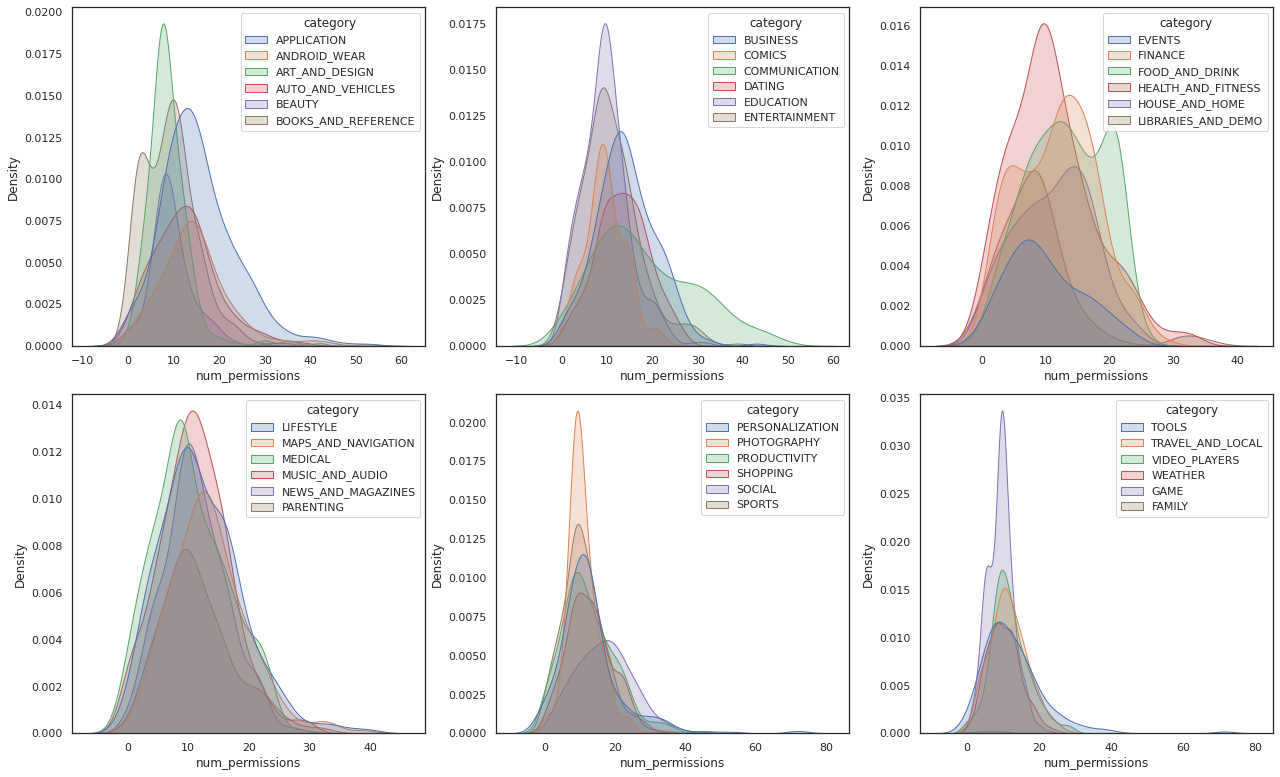

In [16]:
first_cats = ['APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN','AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE']
second_cats = ['BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT']
third_cats = ['EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO']
fourth_cats = ['LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO','NEWS_AND_MAGAZINES', 'PARENTING']
fifth_cats = ['PERSONALIZATION','PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS']
sixth_cats = ['TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER', 'GAME', 'FAMILY']

first_subdf = df[df['category'].isin(first_cats)]
second_subdf = df[df['category'].isin(second_cats)]
third_subdf = df[df['category'].isin(third_cats)]
fourth_subdf = df[df['category'].isin(fourth_cats)]
fifth_subdf = df[df['category'].isin(fifth_cats)]
sixth_subdf = df[df['category'].isin(sixth_cats)]

fig, axs = plt.subplots(nrows=2, ncols=3)
fig.tight_layout()
fig.subplots_adjust(wspace=.2)
fig.set_figheight(11)
fig.set_figwidth(18)

plot = sns.kdeplot(data=first_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][0])
plot = sns.kdeplot(data=second_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][1])
plot = sns.kdeplot(data=third_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][2])
plot = sns.kdeplot(data=fourth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][0])
plot = sns.kdeplot(data=fifth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][1])
plot = sns.kdeplot(data=sixth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][2])

plt.savefig('ked_of_permissions.png', bbox_inches = "tight")

In [24]:
cluster = dict()

for idx, row in df.iterrows():
    d = ast.literal_eval(row['permissions'])
    cat = row["category"]
    if cat not in cluster:
        cluster[cat] = dict()
    for key, val in d.items():
        for item in val:
            if item not in cluster[cat]:
                cluster[cat][item] = list()
            cluster[cat][item].append(row["appId"])
          
# get a max and min and average.
# app that has the max number of permissons
for key, val in cluster.items():
    print(key)
    print(len(val))
    for k, v in val.items():
        print('\t', k)
        for item in v:
            print('\t\t', item)

APPLICATION
76
	 retrieve running apps
		 com.zhiliaoapp.musically
		 com.whatsapp
		 com.instagram.android
		 com.enflick.android.TextNow
		 sg.bigo.live
		 com.zzkko
		 com.psafe.msuite
		 com.tinder
		 video.like
		 com.mcdonalds.app
		 com.affinity.rewarded_play
		 com.audible.application
		 com.facebook.katana
		 com.cisco.webex.meetings
		 com.netflix.mediaclient
		 com.sec.android.easyMover
		 com.facebook.lite
		 com.ringapp
		 com.microsoft.appmanager
		 mymacros.com.mymacros
		 com.g19mobile.gameboosterplus
		 net.dinglisch.android.taskerm
		 com.grindrapp.android
		 com.imvu.mobilecordova
		 com.showtime.standalone
		 com.tangerine.live.cake
		 com.naver.linewebtoon
		 com.zhangyue.read
		 com.fitbit.FitbitMobile
		 com.hily.app
		 com.smule.singandroid
		 com.strava
		 com.sideline.phone.number
		 com.read.goodnovel
		 com.taggedapp
		 com.opera.app.news
		 com.appsinnova.android.keepclean
		 dji.go.v5
		 com.playstation.mobile2ndscreen
		 com.mt.mtxx.mtxx
		 com.nbcuni.nbc

		 com.tocaboca.tocacity
		 com.tocaboca.tocapetdoctor
		 com.tocaboca.tocapetdoctor
		 com.matthewlberg.j23
		 com.matthewlberg.j23
		 com.teamspeak.ts3client
		 com.teamspeak.ts3client
		 com.seacloud.bc
		 com.seacloud.bc
		 com.t11.skyview
		 com.t11.skyview
		 com.scannerradio_pro
		 com.scannerradio_pro
		 org.twisevictory.apps
		 org.twisevictory.apps
		 com.media44seven.seventyfivehard
		 com.media44seven.seventyfivehard
		 com.simplemobiletools.gallery.pro
		 com.simplemobiletools.gallery.pro
		 com.tocaboca.tocalab
		 com.tocaboca.tocalab
		 com.hydrix.laurene
		 com.hydrix.laurene
		 com.borisov.strelokpro
		 com.borisov.strelokpro
		 com.vexcode.ioskwgt
		 com.vexcode.ioskwgt
		 com.tocaboca.tocaafterschool
		 com.tocaboca.tocaafterschool
		 com.mxtech.videoplayer.pro
		 com.mxtech.videoplayer.pro
		 jp.ne.ibis.ibispaint.app
		 jp.ne.ibis.ibispaint.app
		 com.cheekydevs.fiswitch
		 com.cheekydevs.fiswitch
		 com.ccswe.appmanager.samsung_20201007
		 com.ccswe.appmanager.sams

		 com.inkr.comics
		 com.cleanteam.onesecurity
		 com.aol.mobile.aolapp
		 co.madseven.wiiny
		 messenger.fb.fbmessenger
		 co.triller.droid
		 com.free.go.vpn.ivn
		 com.infonow.bofa
		 com.erieinsurance.customermobile
		 com.twentythreeandme.app
		 com.tplink.kasa_android
		 com.sudy.cougar
		 messenger.social.chat.apps
		 com.pocofontya.modamongus
		 gotit.com.gotit
		 com.apple.bnd
		 com.ranroms.fficloe.videoedit
		 com.bagatrix.mathway.android
		 com.zyxwhite.qrcoderw
		 gr.pixelab.sketch
	 read your contacts
		 com.zhiliaoapp.musically
		 us.zoom.videomeetings
		 com.whatsapp
		 com.squareup.cash
		 com.instagram.android
		 com.amazon.mShop.android.shopping
		 com.google.android.apps.meetings
		 com.snapchat.android
		 com.paypal.android.p2pmobile
		 com.enflick.android.TextNow
		 sg.bigo.live
		 qrcodereader.barcodescanner.scan.qrscanner
		 com.zzkko
		 com.adobe.reader
		 com.psafe.msuite
		 com.onedebit.chime
		 com.tinder
		 me.lyft.android
		 com.venmo
		 com.teacapps.barc

		 com.azure.authenticator
		 me.lyft.android
		 com.tubitv
		 com.venmo
		 video.like
		 com.hulu.plus
		 org.telegram.messenger
		 com.mcdonalds.app
		 epic.mychart.android
		 com.particlenews.newsbreak
		 com.poshmark.app
		 com.affinity.rewarded_play
		 com.goodrx
		 com.google.android.apps.youtube.kids
		 com.google.android.apps.chromecast.app
		 com.calm.android
		 com.target.ui
		 com.duolingo
		 com.yahoo.mobile.client.android.mail
		 com.facebook.orca
		 com.disney.disneyplus
		 com.google.android.play.games
		 com.reddit.frontpage
		 com.amazon.dee.app
		 tv.pluto.android
		 qtstudio.minecraft.modsforminecraftpe.world
		 com.audible.application
		 com.pandora.android
		 com.chase.sig.android
		 com.grammarly.android.keyboard
		 com.microsoft.office.outlook
		 com.google.android.apps.translate
		 com.oculus.twilight
		 com.videocalls.siren.head
		 com.fetchrewards.fetchrewards.hop
		 com.microsoft.teams
		 com.dd.doordash
		 com.pinterest
		 com.facebook.katana
		 gov.ny.healt

		 com.teamspeak.ts3client
		 com.scannerradio_pro
		 com.scannerradio_pro
		 com.cheekydevs.fiswitch
		 com.cheekydevs.fiswitch
		 com.wilysis.cellinfo
		 com.wilysis.cellinfo
		 net.liveatc.liveatc_app
		 net.liveatc.liveatc_app
		 com.filmic.filmicpro
		 com.filmic.filmicpro
		 com.digipom.easyvoicerecorder.pro
		 com.digipom.easyvoicerecorder.pro
		 com.riteshsahu.SMSBackupRestorePro
		 com.riteshsahu.SMSBackupRestorePro
		 org.prowl.torque
		 org.prowl.torque
		 net.dinglisch.android.taskerm
		 net.dinglisch.android.taskerm
		 com.ascendlearning.uglys.purchase
		 com.ascendlearning.uglys.purchase
		 onxmaps.hunt
		 onxmaps.hunt
		 com.crunchyroll.crunchyroid
		 com.crunchyroll.crunchyroid
		 com.microsoft.skydrive
		 com.microsoft.skydrive
		 com.intsig.camscanner
		 com.intsig.camscanner
		 com.tapastic
		 com.tapastic
		 com.showtime.standalone
		 com.showtime.standalone
		 com.tangerine.live.cake
		 com.tangerine.live.cake
		 com.bydeluxe.d3.android.program.starz
		 com.bydelux

		 com.venmo
		 video.like
		 org.telegram.messenger
		 com.mcdonalds.app
		 com.affinity.rewarded_play
		 com.google.android.apps.youtube.kids
		 com.facebook.orca
		 com.reddit.frontpage
		 com.google.android.apps.translate
		 com.microsoft.teams
		 com.facebook.katana
		 com.ubercab.eats
		 com.quibi.qlient
		 com.Funimation.FunimationNow
		 com.cisco.webex.meetings
		 com.myklarnamobile
		 com.twitter.android
		 tv.twitch.android.app
		 com.facebook.lite
		 com.microsoft.appmanager
		 com.ubercab
		 com.symantec.securewifi
		 com.panda.gamepad
		 com.teamspeak.ts3client
		 com.mxtech.videoplayer.pro
		 com.alexvas.dvr.pro
		 com.autolauncher.motorcar
		 org.prowl.torque
		 net.dinglisch.android.taskerm
		 com.grindrapp.android
		 com.microsoft.skydrive
		 com.tangerine.live.cake
		 com.microsoft.office.word
		 com.zhangyue.read
		 com.sgiggle.production
		 com.espn.score_center
		 com.robokiller.app
		 com.babbel.mobile.android.en
		 com.takimi.android
		 com.matchtech.cafe
		 com.

		 com.accuweather.android
		 com.google.android.wearable.app
		 com.acmeaom.android.myradar
		 com.VirtualMaze.gpsutils
		 com.appgeneration.itunerfree
		 com.augmentra.viewranger.android
		 com.joelapenna.foursquared
		 com.google.android.apps.messaging
		 com.aa.android
		 com.nike.plusgps
		 com.todoist
		 com.google.android.apps.maps
		 com.glidetalk.glideapp
		 com.regasoftware.udisc
		 com.virtualmaze.offlinemapnavigationtracker
		 com.taxsee.taxsee
		 com.endless.healthyrecipes
		 com.ford.mfm
		 com.callapp.contacts
		 com.google.android.apps.fitness
		 com.smartwatch.bluetooth.sync.notifications
		 com.safetrekapp.safetrek
		 xyz.klinker.messenger
		 com.runtastic.android
		 aplicacion.tiempo
		 com.resultadosfutbol.mobile
		 com.coulombtech
		 pl.lawiusz.funnyweather.release
		 com.whiz.droneapp
		 com.wego.android
		 pandamonium.noaaweather
		 com.shazam.android
		 com.fishbrain.app
		 com.jeremysteckling.facerrel
		 com.simplywerx.compass2d
		 com.superthomaslab.hueessenti

		 de.stocard.stocard
		 fi.polar.polarflow
		 com.appgeneration.itunerpro
		 com.ua.makeev.wearcamera
		 com.appmosaic.tidechart
		 com.pujie.wristwear.pujieblack
		 com.mobiltal.geoohGO
		 com.appmosaic.moonwatch
		 com.skimble.workouts
		 com.imperon.android.gymapp
		 com.mydiabetes
		 com.ingravity.woo
		 dyna.logix.bookmarkbubbles
		 com.hole19golf.hole19.beta
		 com.aita
		 dd.watchmaster
		 com.endel.endel
		 com.fitiv.fitivapplication
		 com.apposter.watchmaker
		 com.wearablewidgets
		 com.kemasdimas.wristcamera
	 view network connections
		 com.accuweather.android
		 com.google.android.wearable.app
		 com.acmeaom.android.myradar
		 com.VirtualMaze.gpsutils
		 com.washingtonpost.android
		 com.customsolutions.android.alexa
		 com.dungelin.heartrate
		 com.appgeneration.itunerfree
		 com.augmentra.viewranger.android
		 com.mobilefootie.wc2010
		 com.ua.makeev.antitheft
		 com.joelapenna.foursquared
		 com.google.android.apps.messaging
		 com.aa.android
		 com.coffeebeanventures

		 dyna.logix.bookmarkbubbles
		 com.appfour.wearinstruments
		 com.hole19golf.hole19.beta
		 com.aita
		 com.sg57.tesladashboard
		 co.refsix
		 com.mobilecreatures.drinkwater
		 com.appfour.wearlauncher
		 dd.watchmaster
		 com.lionscribe.hebdate
		 horse.schvung.equilab
		 com.endel.endel
		 adarshurs.android.vlcmobileremote
		 com.appfour.wearbrowser
		 com.sixtostart.zombies5ktraining
		 com.fitiv.fitivapplication
		 com.apposter.watchmaker
		 com.appfour.wearphotos
		 org.leetzone.android.yatsewidgetfree
		 com.safeincloud.free
		 com.bosenko.watchface.marinecommander
		 com.appfour.wearmail
		 com.bestweatherfor.bibleoffline_pt_ra
		 com.kemasdimas.wristcamera
		 com.appfour.weartracker
		 ru.aviasales
		 com.corproxy.player
	 read Google service configuration
		 com.accuweather.android
		 com.google.android.wearable.app
		 com.VirtualMaze.gpsutils
		 com.joelapenna.foursquared
		 com.google.android.apps.messaging
		 com.aa.android
		 com.google.android.deskclock
		 com.journey.

		 app.kousick.dafonts
		 app.kousick.dafonts
		 com.forqan.tech.BeautyColoring
		 com.forqan.tech.BeautyColoring
		 anime.transformation.cartoon.face.changer.sketchart
		 anime.transformation.cartoon.face.changer.sketchart
		 com.setiamedia.coloringbookgacha
		 com.setiamedia.coloringbookgacha
		 splendid.postermaker.designer
		 splendid.postermaker.designer
		 com.ayogamez.sketchcartoon
		 com.ayogamez.sketchcartoon
		 com.draw.paint.sketch.one
		 com.draw.paint.sketch.one
		 ktech.sketchar
		 ktech.sketchar
		 com.happytime.Ladybugg
		 com.happytime.Ladybugg
		 com.zakhrafat.ism
		 com.zakhrafat.ism
		 com.jdpapps.textt1
		 com.jdpapps.textt1
		 com.labelcreator.label.maker
		 com.labelcreator.label.maker
		 com.kidspaint.kaushalmehra.drawingfun
		 com.kidspaint.kaushalmehra.drawingfun
		 com.axndx.ig
		 com.axndx.ig
		 com.appxstudio.smokearteffect
		 com.appxstudio.smokearteffect
		 com.tattoo.maker.design.app
		 com.tattoo.maker.design.app
		 com.ng_labs.kidspaint
		 com.ng_labs.

		 com.freesneakers.coloringbok
		 com.eskamedia.la.lakers.wallpapers
		 com.perfectworld.vn.wallpaper.live.anime
		 com.dramastd.juicewrld
		 com.horrorice.drawmeat
		 com.meltinglogic.pixly
		 com.dabibokunoheroacademia.myheroacademiadeku
		 com.Kan.BitEmoji
	 control vibration
		 anime.art.paint.tap.color.by.number.free
		 air.com.KalromSystems.SandDrawLite
		 com.covermaker.thumbnail.maker
		 com.ripl.android
		 com.creative.colorfit.mandala.coloring.book
		 com.eyewind.paperone
		 jp.ne.ibis.ibispaintx.app
		 com.kanishka_developer.SketchPad
		 com.redberry.glitter123Abc
		 com.picsart.animate
		 com.vblast.flipaclip
		 com.redberry.glitterlips
		 com.createlogo.logomaker
		 com.huion.inkpaint
		 com.bytestorm.artflow
		 com.procreate.pro_paint
		 com.webgenie.ioslauncher
		 com.baramgames.ColoringByNumber1
		 com.nra.flyermaker
		 com.PixelStudio
		 com.camera.sketch.camera.pencil
		 com.behance.behance
		 com.ved.pubg_avatar
		 com.forqan.tech.BeautyColoring
		 com.setiamedia.co

		 com.shaders.texture.pack.seus.ultra.mod
		 com.apocalypse.zombie.mod.addons.mutant
		 com.optimumbrewlab.invitationcardmaker
		 com.rstream.learndrawing
		 com.furniture.mods.addons.furnicraft.craft.crazy
		 com.freay.chachuy.freecy
	 add or remove accounts
		 com.adobe.creativeapps.gather
		 com.adobe.creativeapps.sketch
		 com.behance.behance
		 com.iphone.xs.launcher.prime.ios12.theme
		 com.focodesign.focodesign
	 reorder running apps
		 com.adobe.creativeapps.gather
	 create accounts and set passwords
		 com.adobe.creativeapps.gather
		 com.adobe.creativeapps.sketch
		 com.behance.behance
	 use accounts on the device
		 com.adobe.creativeapps.gather
		 com.vblast.flipaclip
		 com.bytestorm.artflow
		 com.adobe.creativeapps.sketch
		 com.behance.behance
		 com.sec.penup
		 com.zalivka.animation
	 set wallpaper
		 com.objectremover.touchretouch
		 com.webgenie.ioslauncher
		 aesthetic.wallpaper
		 com.IngressStudio.xxxtentacion
		 com.freefire.diamonds.guide.tricks
		 com.phone.u

		 com.crazydog.teslatasker
		 com.lwi.android.flappsauto
		 com.softronix.V1Driver
		 com.sgiroux.aldldroid
		 com.williwoodstudios.pureviews
		 com.obdhightech.obd2.chevroletsystem.readdtc.chevroletsysscanpro
		 com.ideeo.miadvanced
		 com.pjt.realtimecharts_v1
		 com.binarytoys.speedometerpro
		 com.min.carpro
		 com.ideeo.niadvanced
		 net.leveugle.teslaadvancednotification
		 com.navimods.radio
		 com.ideeo.tyadvanced
		 com.emon.canbus.tesla
		 com.bymirza.net.dtcfix_pro
		 com.planetcoops.android.taximeter
		 com.virtualdyno.android
		 com.mhd.flasher.n55
		 com.prizmos.carista
		 com.autel.maxiap200.autelap
		 net.bimmergeeks
		 com.napko.RealDash
		 com.gns.citytrash.trucksimulator
		 com.myfreevinapp.ford
		 ru.speedfire.flycontrolcenter
		 com.iViNi.carlyForToyotaLITE
		 com.nhra
		 com.myfreevinapp.mb
		 com.nezdroid.cardashdroid
		 com.iViNi.bmwhatLite
		 com.zonewalker.acar
		 com.mhd.flasher.fseries
		 pl.gswierczynski.motolog
		 com.autocatalystmarket
		 com.connections

		 io.moj.mobile.android.motion
		 io.moj.mobile.android.motion
		 com.autotrader.android
		 com.autotrader.android
		 com.coolniks.niksgps
		 com.coolniks.niksgps
		 com.autolist.autolist
		 com.autolist.autolist
		 com.boatsgroup.boattrader
		 com.boatsgroup.boattrader
		 com.carvana.carvana
		 com.carvana.carvana
		 com.lexus.oneapp
		 com.lexus.oneapp
		 com.autopten.cheapcarsforsale
		 com.autopten.cheapcarsforsale
		 com.mtsdealersolutions.vindecoded
		 com.mtsdealersolutions.vindecoded
		 com.fixdapp.two
		 com.fixdapp.two
		 com.innova.rs2
		 com.innova.rs2
		 com.pnn.obdcardoctor
		 com.pnn.obdcardoctor
		 com.carshield.app
		 com.carshield.app
		 com.motordata.obd
		 com.motordata.obd
		 com.libertymutual.uscm.righttrack
		 com.libertymutual.uscm.righttrack
		 com.ebay.motorsapp
		 com.ebay.motorsapp
		 altergames.carlauncher
		 altergames.carlauncher
		 us.nonda.zus
		 us.nonda.zus
		 com.paybyphone
		 com.paybyphone
		 com.chipsguide.app.roav.fmplayer
		 com.chipsguide.app.

		 com.fixdapp.two
		 com.drivemode.android
		 de.myaudi.mobile.assistant
		 com.techindustan.truckbook
		 com.fair.fairapp
		 com.garmin.android.apps.gecko
		 com.technologypartnerspr.autoexpreso
		 com.bitspice.automate
		 com.arity.routereport
		 com.ntk.Rove
		 com.lwi.android.flappsauto
		 com.softronix.V1Driver
		 com.binarytoys.speedometerpro
		 com.navimods.radio
		 com.napko.RealDash
		 com.nezdroid.cardashdroid
		 com.whereify.aggps
		 com.AutoRepairInvoice
		 com.ekonom.taxi
	 expand/collapse status bar
		 altergames.carlauncher
	 access extra location provider commands
		 us.nonda.zus
		 com.driversnote.driversnote
		 com.gridwise.app
		 com.lkqcorp.MobileGarage
		 com.binarytoys.speedometerpro
		 com.planetcoops.android.taximeter
		 ru.speedfire.flycontrolcenter
		 com.whereify.aggps
		 com.happyfuncorp.tesla
		 com.efiAnalytics.shadowdash
		 com.aaa.finsmc
		 com.bolt.carrier
		 com.xpressystems.xwcustomerapp.holiday
	 access USB storage filesystem
		 us.nonda.zus
		 com.

		 com.perfectcorp.amb
		 com.wasafat.tabiia.lijamalik
		 com.chamsDohaLtd.Tools.Zakhrafa
		 emoji.photo.editor
		 com.magicvfacemakeup.beauty.makeup.camera.selfie.photoeditor.dailyaims
		 com.foreo.foreoapp
		 com.mirror.photoframeapp
		 com.gast.tattoo.drawing.ink.inc.tattoo.maker.game
		 crown.heart.photo.editor
		 com.Manicure.Pedicure.Games.Nail.Art.Designs.Salon
		 com.app.pureple
		 com.her.skinsafeproducts.skinsafe
		 filter.selfie.camera.photo.stickers
		 net.booksy.customer
		 net.braincake.pixl.pixl
		 heart.crown.camera.effect.snap.photoeditor.heartcrowncamera.stickers
		 com.sephora
		 com.vinnabeauty.android.vinna
		 cofs.filters4snapchat
		 kynguyen.app.mirror
		 com.ipsy.mobile.production
		 com.workout.play.goal.fitness
		 com.scentbird
		 com.zhanlang.changehaircut
		 com.styleseat.promobile
		 beautyrooom.filtersforselfie.sweet.face.camera
		 so.camera.live.face.filter
		 pcm.art.heart.camera
		 com.Outfits.Ideas.Trends
		 net.booksy.business
		 com.beautysystemsgrou

		 com.mydigitalearth.sibleybirds
		 com.trucnguyen.calibresync
		 com.trucnguyen.calibresync
		 com.godpeople.GPBIBLE
		 com.godpeople.GPBIBLE
		 com.warbler.android
		 com.warbler.android
		 com.tecarta.NASBStrongs
		 com.tecarta.NASBStrongs
		 com.goodbarber.shiftlocktwo
		 com.goodbarber.shiftlocktwo
		 com.tecarta.NASBMacArthur
		 com.tecarta.NASBMacArthur
		 com.flyersoft.moonreaderp
		 com.flyersoft.moonreaderp
		 com.multipie.calibreandroid
		 com.multipie.calibreandroid
		 com.cepher.cepherapp
		 com.cepher.cepherapp
		 com.cantcha.imissal
		 com.cantcha.imissal
		 com.joshlefler.tennesseelaw
		 com.joshlefler.tennesseelaw
		 pro.holy.bible.king.james
		 pro.holy.bible.king.james
		 bible.kingjamesbiblelite.buy
		 bible.kingjamesbiblelite.buy
		 cc.ElectricianTrampGuide
		 cc.ElectricianTrampGuide
		 com.animatedknots.knots
		 com.animatedknots.knots
		 com.simulationcurriculum.skysafari6plus
		 com.simulationcurriculum.skysafari6plus
		 com.xer0.admin.zer0bo0ks
		 com.xer0.ad

		 hr.apps.n207007048
		 archive.booksadfree
		 com.flipread.novel
		 biblereader.olivetree
		 com.xiaoshuo.beststory
		 com.jr.cdxs.spain
		 com.changdu.ereader3.en
		 com.starttoreadapp.www
		 com.rnovel365.dcwh.novel
		 com.artscroll.digitallibrary
		 com.mobisystems.ubreader_west
		 com.changdu.ereader
		 kr.co.millie.millieshelf
		 ru.litres.android
		 com.novelbee.ebook
		 com.wuxiaworld.mobile
		 com.changdu.spainreader
		 com.kread.app
		 com.aynovel.vixs
		 com.inceptionxr.bookful.app.android
		 joansoft.dailybible
		 com.tecarta.TecartaBible
		 com.jr.cdxs.ereader
		 com.luojilab.player
		 com.user75.numerology2
		 com.qr.inovel
		 air.com.myheritage.mobile
		 com.babelnovel.story
		 com.dreamelite.reader
		 ru.mybook
		 com.anyreads.patephone
		 org.idisciple.idiscipleapp
		 com.gty.macarthurstudybible
		 grit.storytel.app
		 com.wandu.kbooks.reader
		 ru.litres.android.audio
		 com.prestigio.ereader
		 com.changdu.ereader3.es
		 com.caribu.Caribu
		 com.zhao.love.reader
		 

		 com.google.android.stardroid
		 com.ebooksstudio.free.books
		 com.richshapero.tfma
		 com.merriamwebster
		 write.read.story.webnovel.book.anystories
		 com.dictionary
		 com.yahoo.onesearch
		 com.zhangyue.read.storytube
		 com.google.android.apps.books
		 com.overdrive.mobile.android.mediaconsole
		 com.home.bible.verse.prayer
		 com.invictustudio.amonguide
		 com.Devl.N_S_R.CarGameWalkthrough
		 com.audiobooks.androidapp
		 com.learn.bibliavalera
		 com.hmobile.biblekjv
		 com.offline.bible
		 com.stardust.kissreader
		 bible.kingjamesbiblelite
		 org.blueletterbible.blb
		 fortnitebattleroyale.chaptertwoseasonfor
		 com.bookfunnel.bookfunnel
		 com.hyperionics.avar
		 com.taleread.novel
		 com.ellie.hi.neighbor.guide
		 kjv.bible.kingjamesbible
		 com.guideamong.newtips.amongus
		 com.goodreads
		 org.readera
		 tv.telepathic.hooked
		 com.eston.pokecraft
		 com.read.realm
		 com.scribd.app.reader0
		 com.bible.verses.notiondigital
		 com.fortntegag.fondospapersfans
		 com.mobi

	 change system display settings
		 bn.ereader
		 com.xiaoshuo.beststory
	 install shortcuts
		 com.flyersoft.moonreaderp
		 com.multipie.calibreandroid
		 com.app.dean
		 com.mobisystems.ubreader_west
		 com.changdu.ereader
		 com.changdu.spainreader
		 com.pleco.chinesesystem
		 com.sfacg
		 jekan.dnd5database
	 erase USB storage
		 com.lingea.handylex.lkenh1
	 read calendar events plus confidential information
		 hr.apps.n207007048
		 com.caribu.Caribu
		 com.among.amongustips
	 add or modify calendar events and send email to guests without owners' knowledge
		 hr.apps.n207007048
		 com.caribu.Caribu
		 com.among.amongustips
	 control flashlight
		 hr.apps.n207007048
		 com.bookmate
	 access USB storage filesystem
		 com.starttoreadapp.www
		 com.rnovel365.dcwh.novel
		 com.novelbee.ebook
		 com.kread.app
		 com.aynovel.vixs
		 com.luojilab.player
		 com.wandu.kbooks.reader
		 com.sfacg
		 com.lumo.woe
	 uninstall shortcuts
		 com.changdu.ereader
		 com.changdu.spainreader
	 read ba

		 com.Slack
		 com.bluejeansnet.Base
		 com.languagetranslator.translatorapp.smartscanner.dictionary.translation.voicetranslator
		 com.usps
		 com.linkedin.android
		 com.grubhub.driver
		 com.airwatch.androidagent
		 com.ubercab.driver
		 com.fiverr.fiverr
		 com.google.android.apps.dynamite
		 pdf.tap.scanner
		 com.kronos.mobile.android
		 com.gotomeeting
		 com.amazon.atozm
		 com.bpmobile.iscanner.free
		 com.paylocity.paylocitymobile
		 com.facebook.pages.app
		 com.dayforce.mobile
		 com.whova.event
		 com.ups.mobile.android
		 com.microsoft.windowsintune.companyportal
		 com.adpmobile.android
		 com.squareup
		 com.anydesk.anydeskandroid
		 com.usps.myusps_mobile_app_android
		 com.simplescan.scanner
		 com.ultimatesoftware.ultipromobile
		 com.logmein.gotowebinar
		 com.bg.flyermaker
		 net.itx.paychex
		 com.fedex.ida.android
		 com.ziprecruiter.android.release
		 com.workday.workdroidapp
		 air.com.adobe.connectpro
		 com.glip.mobile
		 com.facebook.adsmanager
		 com.adobe

		 com.freedomsoft.app
		 edu.nshs.employeeapp
		 mobile.app5AEJyDLPqe
		 com.fiberlink.maas360.android.oem.lg
		 com.spatialnetworks.fulcrum
		 com.pse.selfservice
		 com.enspire.sgsco
		 com.reflexis.android.mywork1610
		 com.salesforce.chatter
		 com.getjobber.jobber
		 com.voteractivationnetwork.minivan
		 com.novatime.novaclock
		 com.chartmetric
		 com.jazz.jazzworld
		 com.pegasustranstech.transflomobileplus.pands
		 com.gardenstate
		 money.whish.android
		 com.attendify.app
		 io.kodular.abdulmatin05me.Uline
		 com.pureromance.puresale
		 com.houzz.pro
		 com.cvent.mobile.eventapp
		 com.ionicframework.ionicapp410897
		 com.app.testpiwik
		 com.cissolucis.superlife
		 mobile.appaSGkoHqElh
		 com.etouches.loopdevents
		 gov.fultoncountyga.fultonvotes
		 com.mysalesforce.salesforce1.C00D3h0000057S4CEAU.A0OT3h000000TOYEGA4
		 com.instaworkmobile
		 com.easy4u.scanner
		 com.taketheinterview.android.live
		 com.raise3d.raisecloud
		 dev.gigworks.co
		 com.attendify.confjhwp0v
	 mo

		 com.invoicehome.invoicehome
		 org.kman.AquaMail
		 org.kman.AquaMail
		 com.actualsoftware.faxfile
		 com.actualsoftware.faxfile
		 cm.confide.android
		 cm.confide.android
		 com.xactware.remodel
		 com.xactware.remodel
		 com.jetsign.app
		 com.jetsign.app
		 com.scottsware.ezbidandroid
		 com.scottsware.ezbidandroid
		 com.invoiceapp
		 com.invoiceapp
		 com.skiracer.topo_android_market
		 com.skiracer.topo_android_market
		 com.adstocash.scanner
		 com.adstocash.scanner
		 com.aadhk.time
		 com.aadhk.time
		 com.digipunchcard.loyalty
		 com.digipunchcard.loyalty
		 com.glykka.easysign
		 com.glykka.easysign
		 com.splashtop.remote.pad.v2
		 com.splashtop.remote.pad.v2
		 com.intsig.BCRLite
		 com.intsig.BCRLite
		 com.delgeo.desygner
		 com.delgeo.desygner
		 com.piksoft.turbofax
		 com.piksoft.turbofax
		 com.ninefolders.hd3
		 com.ninefolders.hd3
		 com.shapr
		 com.shapr
		 com.extracomm.snapfax
		 com.extracomm.snapfax
		 com.stockmanagment.next.app
		 com.stockmanagment.ne

		 com.uber.restaurants
		 com.squareup.invoicesapp
		 ma.android.uManage
		 com.vl.infotrax.xyngular
		 com.oilpatchpro.app
		 com.mobitech3000.jotnotscanner.android
		 com.pivotradio.bhrs
		 com.berrywing.scantospreadsheet
		 com.ICRSSPro
		 com.invoice2go.invoice2goplus
		 com.netqin.ps
		 com.sinc.sincandroid
		 com.doft.android.carrier
		 com.joistapp.android.joist
		 com.sitefinder.wellsitenavigatorusa
		 com.iplum.android
		 com.zoho.invoice
		 com.taxbot
		 com.dynamixsoftware.printershare
		 com.zmobileapps.logomaker
		 com.d4d.android
		 com.epitosoft.wellsitemaps
		 com.skiracer.topo_android_market
		 com.intsig.BCRLite
		 com.shapr
		 au.com.tapstyle
		 com.invoiceasap.nativeapp
		 com.zoho.books
		 io.trigger.forge633ed212c46d11e185cd12313d1adcbe
		 au.com.speedinvoice.android
		 co.timesquared.timetracker
		 com.cribasoft.HoursTrackerFree.Android
		 com.easyexpense
		 com.applaudsoft.wabi.virtual_number
		 com.petropath.first
		 com.ezclocker
		 gov.fortbendcountytx.myfbc

		 com.google.android.apps.dynamite
		 com.google.android.apps.vega
		 com.google.android.apps.adwords
		 com.pdp.deviceowner
		 com.pdmdm.dmplay
		 com.google.android.apps.giant
	 control flashlight
		 com.kronos.mobile.android
		 com.ups.mobile.android
		 com.simplescan.scanner
		 com.dominionenergy.oneapp
		 com.kronos.dimensions.enterprise
		 com.shipt.shopper
		 com.appxy.tinyscanner
		 com.amazon.sellermobile.android
		 com.stoik.mdscan
		 com.pivotradio.bhrs
		 com.ICRSSPro
		 com.simpleapp.fax
		 com.appxy.tinyinvoice
		 com.adstocash.scanner
		 com.stockmanagment.next.app
		 com.studio.topfax
		 com.easyexpense
		 com.spatialnetworks.fulcrum
		 com.reflexis.android.mywork1610
		 com.deltek.dps.time
		 com.raise3d.raisecloud
	 access extra location provider commands
		 com.adpmobile.android
		 com.shiftsmart.workerapp
		 com.kronos.workforceready
		 com.xpo.DriveXPO
		 com.pivotradio.bhrs
		 com.sinc.sincandroid
		 com.petropath.first
		 com.salesforce.chatter
		 com.novatime.n

		 com.topsimulationgames.quad.bike.stunts.offroad.driving.mania2019
		 com.topsimulationgames.quad.bike.stunts.offroad.driving.mania2019
		 com.ds.police.gangster.revenge
		 com.ds.police.gangster.revenge
		 com.rookiestudio.perfectviewer
		 com.rookiestudio.perfectviewer
		 com.bg.monster.rampage
		 com.bg.monster.rampage
		 com.gamesworld.ninja.battleground.survival
		 com.gamesworld.ninja.battleground.survival
		 net.manga.mr.mangareader
		 net.manga.mr.mangareader
		 com.tigs.monster.dinosaur.rampage.city.attack.hunter.freegames.deadly.shores.simulator.jurassic.run.kiddino
		 com.tigs.monster.dinosaur.rampage.city.attack.hunter.freegames.deadly.shores.simulator.jurassic.run.kiddino
		 com.agz.Black.Spider.Superhero.Monster.Panther.Flash.War
		 com.agz.Black.Spider.Superhero.Monster.Panther.Flash.War
		 com.progdigy.cdisplay.free
		 com.progdigy.cdisplay.free
		 com.ls.Prison.Escape.Mission.Jail.Break
		 com.ls.Prison.Escape.Mission.Jail.Break
		 amongtips.funnymultiplayer.greatfal

		 com.zoiperpremium.android.app
		 com.abicir.addressbookpro
		 com.abicir.addressbookpro
		 com.fongo.international
		 com.fongo.international
		 mobi.biko.exchained
		 mobi.biko.exchained
		 com.spoofcard.app
		 com.spoofcard.app
		 com.telos.app.im
		 com.telos.app.im
		 com.nomorobo
		 com.nomorobo
		 spokeo.com.spokeomobile
		 spokeo.com.spokeomobile
		 ws.coverme.im
		 ws.coverme.im
		 com.newellmediallc.live.coco
		 com.newellmediallc.live.coco
		 phone.automatic.call.recorder.arc
		 phone.automatic.call.recorder.arc
		 com.rebelvox.voxer
		 com.rebelvox.voxer
		 io.hobnob.hobnob
		 io.hobnob.hobnob
		 com.isharing.isharing
		 com.isharing.isharing
		 com.onoffapp.app
		 com.onoffapp.app
		 com.mysms.android.sms
		 com.mysms.android.sms
		 com.syncme.syncmeapp
		 com.syncme.syncmeapp
		 com.hushed.release
		 com.hushed.release
		 com.jb.gosms
		 com.jb.gosms
		 dotsoa.anonymous.texting
		 dotsoa.anonymous.texting
		 com.toktumi.line2
		 com.toktumi.line2
		 lifeisbetteron.com
	

		 com.contapps.android
		 com.contapps.android
		 com.smsBlocker
		 com.smsBlocker
		 com.tangerine.live.cam
		 com.tangerine.live.cam
		 com.callassistant.android
		 com.callassistant.android
		 com.yasirmughal.speedvpn.proxy
		 com.yasirmughal.speedvpn.proxy
		 com.sms.messenger
		 com.sms.messenger
		 com.hayo.chacha
		 com.hayo.chacha
		 events.socio.app1466
		 events.socio.app1466
		 com.ifactorinc.android.avista
		 com.ifactorinc.android.avista
		 org.appa.mobileup
		 org.appa.mobileup
		 net.cidnet.customer.cidnetforandroid
		 net.cidnet.customer.cidnetforandroid
		 com.tempmailsallinone.mailbox2020
		 com.tempmailsallinone.mailbox2020
		 com.rsa.via
		 com.rsa.via
		 app.source.getcontact
		 app.source.getcontact
		 me.bridgefy.main
		 me.bridgefy.main
		 free.textting.messages.sms.mms.free
		 free.textting.messages.sms.mms.free
		 events.socio.app1620
		 events.socio.app1620
		 com.smscolorful.formessenger.messages
		 com.smscolorful.formessenger.messages
		 com.blizzard.mess

		 com.vladlee.callsblacklist
		 com.nbeghin.whatsappmigrator
		 net.snclab.wifitetherrouter
		 com.countercultured.irc4android
		 com.cloudmosa.puffin
		 com.wolphi.morsetrainer
		 cz.acrobits.softphone.aliengroundwire
		 com.spiraldev.promail
		 com.remotehams.rcforb.client
		 com.bestitguys.BetterYouMailPro
		 com.nstenterprises.star_trek_sms_lcars
		 cz.rozkovec.remotedesktop
		 appinventor.ai_chattuck.FerretStickers
		 eu.siacs.conversations
		 Scantech.CarGaugePro
		 com.zoiperpremium.android.app
		 dk.tacit.android.foldersync.full
		 com.crowbar.beaverbrowser
		 com.maildroid.pro
		 com.mstream.easytether_polyclef
		 com.abicir.addressbookpro
		 com.nam.fbwrapper.pro
		 com.fongo.international
		 com.ionicframework.repetierinformer337630
		 com.wolphi.sstv
		 com.pure.browser.plus
		 eu.easytether.pro
		 com.vcps.mts_notify
		 com.eagle.web.browser.fast.privacy.browsers.donwloads.free.pro
		 ru.vsmspro
		 com.stt.mobilehotspotpro
		 com.spoofcard.app
		 com.telos.app.im
		 com.n

		 com.hushed.release
		 com.jb.gosms
		 com.jb.gosms
		 dotsoa.anonymous.texting
		 dotsoa.anonymous.texting
		 com.toktumi.line2
		 com.toktumi.line2
		 uk.co.digitalclockwork.apps.android.anonymoustexting
		 uk.co.digitalclockwork.apps.android.anonymoustexting
		 com.flexaspect.android.everycallcontrol
		 com.flexaspect.android.everycallcontrol
		 com.yollacalls
		 com.yollacalls
		 mobi.drupe.app
		 mobi.drupe.app
		 com.anonyome.mysudo
		 com.anonyome.mysudo
		 com.wGetsetprime_11990119
		 com.wGetsetprime_11990119
		 com.newarabchat.nac
		 com.newarabchat.nac
		 com.esim.numero
		 com.esim.numero
		 flyp.android
		 flyp.android
		 com.counterpath.bria
		 com.counterpath.bria
		 com.fullcontact.ledene
		 com.fullcontact.ledene
		 com.calea.echo
		 com.calea.echo
		 com.melonsapp.privacymessenger
		 com.melonsapp.privacymessenger
		 com.contapps.android
		 com.contapps.android
		 com.smsBlocker
		 com.smsBlocker
		 com.callassistant.android
		 com.callassistant.android
		 com.sms.m

		 com.flexaspect.android.everycallcontrol
		 com.anonymous.caller
		 mobi.drupe.app
		 com.esim.numero
		 flyp.android
		 com.counterpath.bria
		 com.privatecallr
		 com.calea.echo
		 com.melonsapp.privacymessenger
		 com.privacystar.android
		 com.contapps.android
		 com.smsBlocker
		 com.callassistant.android
		 com.sms.messenger
		 events.socio.app1466
		 com.tempmailsallinone.mailbox2020
		 app.source.getcontact
		 free.textting.messages.sms.mms.free
		 events.socio.app1620
		 org.zigramapp.tmlgr
		 com.everbridge.mobile.iv.recipient
		 lv.indycall.client
		 com.vladlee.easyblacklist
		 callid.name.announcer
		 com.lplusapp.newtel
		 messenger.messages.message.sms.mms.text
		 org.upgram.highspeedproxy
		 com.ayoba.ayoba
		 com.septrueseven.truecalleraddress
		 com.sprint.vvm
		 sms.mms.messages.text.free
	 modify your own contact card
		 com.google.android.contacts
		 org.thoughtcrime.securesms
		 com.syncme.syncmeapp
		 com.melonsapp.privacymessenger
		 com.ayoba.ayoba
	 read syn

		 com.ideeo.nsnremote
		 Scantech.CarGaugePro
		 com.zoiperpremium.android.app
		 com.mstream.easytether_polyclef
		 com.wolphi.sstv
		 eu.easytether.pro
		 com.rebelvox.voxer
		 com.onoffapp.app
		 com.palmerperformance.DashCommand
		 com.handcent.app.nextsms
		 mobi.drupe.app
		 com.wGetsetprime_11990119
		 com.counterpath.bria
		 com.callassistant.android
		 events.socio.app1466
		 com.rsa.via
		 me.bridgefy.main
		 events.socio.app1620
		 com.everbridge.mobile.iv.recipient
		 com.septrueseven.truecalleraddress
		 com.sprint.vvm
		 tel.pingme
	 reroute outgoing calls
		 com.google.android.apps.googlevoice
		 com.textfun.text.free.call
		 com.truecaller
		 com.enflick.android.tn2ndLine
		 call.free.international.phone.call
		 com.webascender.callerid
		 com.tmobile.services.nameid
		 spokeo.com.spokeomobile
		 phone.automatic.call.recorder.arc
		 com.syncme.syncmeapp
		 com.mrnumber.blocker
		 mobi.drupe.app
		 com.melonsapp.privacymessenger
		 com.privacystar.android
		 app.source.

		 com.league.theleague
		 com.kinky.fetlifestyle
		 com.kinky.fetlifestyle
		 com.mutualapp
		 com.mutualapp
		 com.rusdate.net
		 com.rusdate.net
		 com.cupidmedia.wrapper.latinamericancupid
		 com.cupidmedia.wrapper.latinamericancupid
		 com.trandrapp.trandr
		 com.trandrapp.trandr
		 com.luzeon.BiggerCity
		 com.luzeon.BiggerCity
		 com.over.seniors
		 com.over.seniors
		 com.cupidmedia.wrapper.filipinocupid
		 com.cupidmedia.wrapper.filipinocupid
		 com.chinalove
		 com.chinalove
		 com.yourtravelmates
		 com.yourtravelmates
		 com.cupidmedia.wrapper.mexicancupid
		 com.cupidmedia.wrapper.mexicancupid
		 com.std.meetup
		 com.std.meetup
		 com.cupidmedia.wrapper.thaicupid
		 com.cupidmedia.wrapper.thaicupid
		 com.cupidmedia.wrapper.colombiancupid
		 com.cupidmedia.wrapper.colombiancupid
		 com.cupidmedia.wrapper.internationalcupid
		 com.cupidmedia.wrapper.internationalcupid
		 com.free.hookup.dating.apps.wild
		 com.free.hookup.dating.apps.wild
		 com.one.goodnight
		 com.one.go

		 com.cupidmedia.wrapper.thaicupid
		 com.cupidmedia.wrapper.colombiancupid
		 com.cupidmedia.wrapper.internationalcupid
		 com.free.hookup.dating.apps.wild
		 com.one.goodnight
		 com.yourchristiandate
		 gayfriendly.gay.dating.app
		 ru.mobstudio.andgalaxy
		 com.stddating.positivesingles
		 com.fancyu.videochat.love.pro
		 com.cupidmedia.wrapper.afrointroductions
		 com.blendr.mobile
		 com.cupidmedia.wrapper.muslima
		 com.sdcmedia.swingers.g3
		 com.cupidmedia.wrapper.asiandating
		 com.cupidmedia.wrapper.japancupid
		 com.jaumo.mature
		 com.itonline.anastasiadate
		 com.guysonlydating
		 com.cupidmedia.wrapper.dominicancupid
		 com.blackwhitemeet
		 com.casualx.hookup
		 com.successfulmatch.mpwh
		 com.flirtwith
		 com.eurodate
		 com.cupidmedia.wrapper.bbwcupid
		 com.cupidmedia.wrapper.vietnamcupid
		 com.localhookupdating.android
		 com.cfishes.christiandating
		 com.akewimeets
		 flirtchat.livegirlsdating
		 com.lifetravel.chatfinder
		 com.pleasuremeetings.sfscnd
		 com.pi

		 com.fetlife.hookupapps.fetish
		 com.fetlife.hookupapps.fetish
		 com.sugardaddy.seekingarrangement.sugarbaby
		 com.sugardaddy.seekingarrangement.sugarbaby
		 com.ttjanulivevideocall.janulivechat
		 com.ttjanulivevideocall.janulivechat
		 com.livevideocallwithgirls.randomvideochatapp
		 com.livevideocallwithgirls.randomvideochatapp
	 read Google service configuration
		 com.curvydating
		 com.app.rondevo
		 com.socialnetwork.hookupsapp
		 mingle.android.mingle2
		 love.waiter.android
		 com.ashleymadison.mobile
		 com.spark.com.silversingles.app
		 com.eharmony
		 co.dilmil.android
		 com.ace.android
		 co.feeld
		 com.wildec.dating.meet4u
		 de.affinitas.za.co.elitesingles.and
		 com.onlinebuddies.manhuntgaychat
		 com.improverllc.meetly
		 com.cougardating.olderwomendating
		 com.asiandate
		 ru.loveplanet.app
		 one.night.casual.secret.adult.singles.dating.meet.match.chat.free.video.hook.up
		 com.wildec.fastmeet
		 com.itonline.anastasiadate
		 net.meetking.android
		 com.gocup

		 com.sharehands.alllanguage.translator.free.voicetranslation
		 com.sharehands.alllanguage.translator.free.voicetranslation
		 com.cutcom.apparmor.unit5
		 com.cutcom.apparmor.unit5
		 com.apptegy.milanc2
		 com.apptegy.milanc2
		 com.rurututor.tutor
		 com.rurututor.tutor
		 com.evilduck.musiciankit
		 com.evilduck.musiciankit
		 com.fluentforever.fluentapp
		 com.fluentforever.fluentapp
		 com.duwo.inter.reading
		 com.duwo.inter.reading
		 com.apptegy.welltonaz
		 com.apptegy.welltonaz
		 myvote.app.ballotpedia
		 myvote.app.ballotpedia
		 com.relianceco.cma.DemingPS
		 com.relianceco.cma.DemingPS
		 com.talpa.translate
		 com.talpa.translate
		 com.lumiclass.app
		 com.lumiclass.app
		 com.mathpresso.qanda
		 com.mathpresso.qanda
		 io.immersivehistory.bible
		 io.immersivehistory.bible
		 xi.uasema
		 xi.uasema
		 edu.nwciowa.raidercheck
		 edu.nwciowa.raidercheck
		 com.finalsite.dwightnewyork
		 com.finalsite.dwightnewyork
		 org.cosi
		 org.cosi
		 com.geekdevdz.dzmoyen
		 co

		 com.siwalusoftware.dogscanner
		 com.minecraft.mods.maps.worldformcpe
		 com.mushroom.shroomify
		 com.miga.world
		 com.google.android.apps.cultural
		 co.kidcasa.app
		 org.khankids.android
		 com.miga.mytown
		 com.speaktranslate.tts.speechtotext.voicetyping.translator
		 kr.co.smartstudy.singingphone_android_googlemarket
		 org.khanacademy.android
		 com.skyward.mobileaccess
		 com.glority.pictureinsect
		 mobi.abcmouse.academy_goo
		 com.PYOPYO.StarTracker
		 com.edpuzzle.student
		 com.wonder
		 me.mycake
		 com.chegg
		 com.learninga_z.onyourown
		 com.instructure.parentapp
		 com.infinitecampus.parent.campusportalhybrid
		 air.com.starfall.more
		 com.panareadigital.Nearpod
		 com.gkgrips.preschoollearning
		 org.talkingpoints.parents
		 com.sagosago.Camping.googleplay
		 com.infinitecampus.student.campusportalhybrid
		 com.blackboard.android.bbstudent
		 com.playtoddlers.sweethomestories.free
		 com.atistudios.mondly.languages
		 com.desmos.calculator
		 com.mojang.minecraf

		 com.remind101
		 com.quizlet.quizletandroid
		 com.miga.mytvshows
		 com.camerascanner.phototranslatorapp
		 es.monkimun.lingokids
		 seesaw.shadowpuppet.co.classroom
		 com.vidku.app.flipgrid
		 com.youdao.hindict
		 com.miga.myfirestation
		 com.instructure.candroid
		 com.joytunes.simplypiano
		 com.miga.myapartment
		 com.vitotechnology.StarWalk2Free
		 com.miga.myschool
		 seesaw.shadowpuppet.co.seesaw
		 com.miga.world
		 com.google.android.apps.cultural
		 co.kidcasa.app
		 org.khankids.android
		 me.mycake
		 com.learninga_z.onyourown
		 org.talkingpoints.parents
		 com.blackboard.android.bbstudent
		 com.atistudios.mondly.languages
		 com.clever.app.android
		 com.freevoicetranslator.languagetranslate.speakandtranslate
		 com.all.language.translator.speech.text
		 com.zima.mobileobservatorypro
		 uk.co.tso.itilfourfoundation
		 org.pbskids.dtgrrificfeelings
		 com.flatearthsun
		 com.fighterverses.android
		 net.musopia.fourchordsjustin
		 com.lingodeer
		 com.busuu.android

		 com.pbs.video
		 com.turner.tbs.android.networkapp
		 me.apptivise.vladnikita
		 com.TWCableTV
		 com.discovery.idsgo
		 com.disney.datg.videoplatforms.android.abc
		 se.laxton.ghost
		 com.gravytraingames.santatrackerlite
		 com.criticalhitsoftware.scanner50
		 com.exelerus.apps.ghostradio
		 com.mobincube.the_pricechecker.sc_HLT1J9
		 com.incorporateapps.fakegps
		 com.wheresgeorge.wgapp
		 com.shadypumpkin.ghosthuntertools
		 com.shellware.AR.Pro
		 com.yiwuzhibo
		 com.univision.univisionnow
		 com.beaverpro.beaverpro
		 com.fun.share
		 com.wheat.mango
		 com.pita.kito
		 com.weieyu.yalla
		 com.halo.mobile
		 com.curiosity.curiositystream
		 com.yalla.yallalite
		 com.chumslive.android
		 net.ib.mn
		 com.huya.nimo
		 com.os.gosing
		 com.naver.vapp
		 toppy.talkingpets.my
		 com.absi.tfctv
		 com.starmakerinteractive.thevoice
		 com.globo.globotv
		 com.video.mini
		 phone.id.faker.real.one
		 focus.camera.focuscamera
		 com.Mod.Among.maps.Us.mcpe
		 com.amazon.alexa.multimod

		 com.piggy.infestion.mod
		 com.astromobile.stickers.raptrap
		 com.jasemaliroshan.newwhatasappsstutesvedio
		 mt.jb.jbfutbol
		 com.viva.kidsflix
		 com.bsdenterprise.qbitsapp.todo.streamtime
		 com.firefly.opentv
		 com.hurtize.skintellerone
		 jackhil.pixel.art.masks.color.number
	 prevent device from sleeping
		 tv.fubo.mobile
		 com.fox.now
		 com.telemundo.awe
		 com.gamepass
		 com.sling
		 me.zepeto.main
		 com.mistplay.mistplay
		 com.xfinity.cloudtvr
		 com.bitstrips.imoji
		 com.baviux.voicechanger
		 com.digidust.elokence.akinator.freemium
		 tv.kidoodle.android
		 com.scee.psxandroid
		 air.com.vudu.air.DownloaderTablet
		 com.google.android.apps.youtube.unplugged
		 com.mcpe.amongus.mod
		 com.feturelabs.feturemoji
		 com.scannerradio
		 com.drink.water.fun
		 com.vidangel.thechosen
		 com.moviesanywhere.goo
		 com.philo.philo.google
		 com.Likewise.apps.Likewise
		 com.discovery.tlcgo
		 com.ringtonesmessengernew.newringtonesforyou19
		 com.science.yarnapp
		 com.buffa

		 com.developer.skyline.countdown
		 ru.otkritkiok.pozdravleniya
		 com.sounds.scaryanimal
		 com.borntoplay.boozeup
		 com.mapsamong.usmod
		 com.piggy.infestion.mod
		 com.astromobile.stickers.raptrap
		 com.jasemaliroshan.newwhatasappsstutesvedio
		 mt.jb.jbfutbol
		 com.sweettangerine.fbiopenup
		 com.viva.kidsflix
		 com.bsdenterprise.qbitsapp.todo.streamtime
		 com.firefly.opentv
		 com.hurtize.skintellerone
		 jackhil.pixel.art.masks.color.number
	 set an alarm
		 tv.fubo.mobile
		 com.sling
		 com.mistplay.mistplay
		 com.babysitme.babysitme
		 com.duplexiptv
		 com.Mod.Among.maps.Us.mcpe
		 com.developer.skyline.countdown
		 ru.otkritkiok.pozdravleniya
	 read the contents of your USB storage
		 com.fox.now
		 com.fox.now
		 com.telemundo.awe
		 com.telemundo.awe
		 com.gamepass
		 com.gamepass
		 me.zepeto.main
		 me.zepeto.main
		 com.mistplay.mistplay
		 com.mistplay.mistplay
		 com.xfinity.cloudtvr
		 com.xfinity.cloudtvr
		 com.bitstrips.imoji
		 com.bitstrips.imoji
		 co

		 com.qhqc.starvoice
		 com.qhqc.starvoice
		 com.beaverpro.beaverpro
		 com.beaverpro.beaverpro
		 com.aetnd.svod.lmc
		 com.aetnd.svod.lmc
		 com.fun.share
		 com.fun.share
		 com.wheat.mango
		 com.wheat.mango
		 com.pita.kito
		 com.pita.kito
		 com.picolo.android
		 com.picolo.android
		 com.weieyu.yalla
		 com.weieyu.yalla
		 com.epix.epix.now
		 com.epix.epix.now
		 com.upfaithandfamily
		 com.upfaithandfamily
		 com.roosterteeth.roosterteeth
		 com.roosterteeth.roosterteeth
		 com.halo.mobile
		 com.halo.mobile
		 com.curiosity.curiositystream
		 com.curiosity.curiositystream
		 com.dramafever.docclub
		 com.dramafever.docclub
		 com.yalla.yallalite
		 com.yalla.yallalite
		 com.horoastroline
		 com.horoastroline
		 com.chumslive.android
		 com.chumslive.android
		 sandbox.art.sandbox
		 sandbox.art.sandbox
		 com.warriorpoetsociety
		 com.warriorpoetsociety
		 com.stingray.karaoke.smc
		 com.stingray.karaoke.smc
		 net.ib.mn
		 net.ib.mn
		 com.nono.android
		 com.nono.androi

		 com.bitstrips.imoji
		 com.Likewise.apps.Likewise
		 com.bsdenterprise.qbitsapp.todo.streamtime
	 modify your contacts
		 com.bitstrips.imoji
		 com.ringtonesmessengernew.newringtonesforyou19
		 com.free.music.ringtones.download.ringtoneapp.mow
		 com.bluesky.best_ringtone.free2017
		 com.bsdenterprise.qbitsapp.todo.streamtime
	 read your contacts
		 com.bitstrips.imoji
		 com.Likewise.apps.Likewise
		 com.ringtonesmessengernew.newringtonesforyou19
		 mobi.ifunny
		 com.americasbestpics
		 com.playfake.fakechat.fakenger.pro
		 com.playfake.instafake.funsta.pro
		 com.jibjab.android.messages.fbmessenger
		 com.topps.disney
		 com.fun.share
		 com.os.gosing
		 com.starmakerinteractive.thevoice
		 com.topps.walkingdead
		 com.video.mini
		 phone.id.faker.real.one
		 com.free.music.ringtones.download.ringtoneapp.mow
		 com.fake.call.free.fakerid.incaller.magic
		 co.clash
		 com.bluesky.best_ringtone.free2017
		 ru.otkritkiok.pozdravleniya
		 com.bsdenterprise.qbitsapp.todo.streamtime
	

		 com.UpstateParadeOfHomes.app
		 com.MTMP2020
	 read phone status and identity
		 com.vividseats.android
		 com.vividseats.android
		 app.mywed.android
		 app.mywed.android
		 com.gametime.gametime
		 com.gametime.gametime
		 tv.game
		 tv.game
		 com.topfan.RevoltSummit
		 com.topfan.RevoltSummit
		 net.mazein.weddingcounter
		 net.mazein.weddingcounter
		 com.ticketfire.android
		 com.ticketfire.android
		 com.grandstand.alabamanational
		 com.grandstand.alabamanational
		 com.citymixr.blockpartypass
		 com.citymixr.blockpartypass
		 com.ticketmaster.mobile.android.na
		 com.ticketmaster.mobile.android.na
		 com.stubhub
		 com.stubhub
		 com.nearify.android
		 com.nearify.android
		 com.estream.telemapper2
		 com.estream.telemapper2
		 com.mmobile.app.event
		 com.mmobile.app.event
		 com.UpstateParadeOfHomes.app
		 com.UpstateParadeOfHomes.app
		 com.stellaris.eventsthatflow
		 com.stellaris.eventsthatflow
		 com.MTMP2020
		 com.MTMP2020
	 precise location (GPS and network-based)


		 com.fortnofffinancial.dealcheck_rentals
		 com.coinstats.crypto.portfolio
		 com.coinstats.crypto.portfolio
		 org.stocktwits.android.activity
		 org.stocktwits.android.activity
		 paystub.calculator.epaystub.paycheck.payroll.fakeid.generator.free
		 paystub.calculator.epaystub.paycheck.payroll.fakeid.generator.free
		 com.fusionmedia.investing
		 com.fusionmedia.investing
		 com.emmaprod
		 com.emmaprod
		 wb.receipts
		 wb.receipts
		 com.dayspringtech.envelopes
		 com.dayspringtech.envelopes
		 com.colpit.diamondcoming.isavemoney
		 com.colpit.diamondcoming.isavemoney
		 com.soul.merge.cat.cute.simulator.adventure
		 com.soul.merge.cat.cute.simulator.adventure
		 com.investors.leaderboard.android
		 com.investors.leaderboard.android
		 com.af.pmodule
		 com.af.pmodule
		 com.mometic.momo
		 com.mometic.momo
		 com.tipigo.signals.benzinga
		 com.tipigo.signals.benzinga
		 com.mzbapps.serverlife
		 com.mzbapps.serverlife
		 in.usefulapp.timelybills
		 in.usefulapp.timelybills
		 co

		 paystub.calculator.epaystub.paycheck.payroll.fakeid.generator.free
		 com.fusionmedia.investing
		 com.emmaprod
		 wb.receipts
		 com.bakua.worktimemanager
		 com.dayspringtech.envelopes
		 com.colpit.diamondcoming.isavemoney
		 com.soul.merge.cat.cute.simulator.adventure
		 com.investry.dev.tsptips
		 com.crypter.cryptocyrrency
		 com.ftm.sniper
		 com.stockmarket.stockscreener
		 com.stockmarket.stockscreener_pro
		 com.profittrading.forbittrex
		 com.investors.leaderboard.android
		 app.gcm.BSN
		 com.gorillatrades.gorillatrades
		 io.vembar.fundamentalspeculation
		 com.af.pmodule
		 com.wsecurepayment.app
		 com.af.payhouse
		 com.mometic.momo
		 com.netdania
		 com.tipigo.signals.benzinga
		 com.mzbapps.serverlife
		 in.usefulapp.timelybills
		 com.marketsmith
		 com.cleevio.spendee
		 com.fxlabsplus.hotpairsfx
		 com.hipstertrader.app
		 com.lenmoinc.lenmo
		 org.pixelrush.moneyiq
		 com.monefy.app.lite
		 com.Splitwise.SplitwiseMobile
		 zeinentech.forexprecision
		 com.pand

		 com.xe.currencypro
		 com.cfa.calculator.pro
		 com.valdio.valdioveliu.daftar
		 com.onetwoapps.mh
		 com.anishu.homebudget.full
		 com.raha.app.mymoney.pro
		 com.monefy.app.pro
		 com.simplysoftsolutions.eprofitPremium
		 com.nikitadev.stockspro
		 com.molovi.checkbook
		 net.thesimplest.managecreditcardinstantly
		 com.realbyteapps.moneya
		 com.quicken.acme
		 com.savved.uptick
		 io.getdelta.android
		 com.fxlabsplus.currencyheatwave
		 com.finicity.mvelopes
		 co.peeksoft.stocks
		 com.mobiledatalabs.mileiq
		 com.pocketguard.android.app
		 com.keepertax
		 com.rubicoin.invest
		 com.invstr.invstrandroidv3
		 com.thisismilo.android
		 com.droid4you.application.wallet
		 app.hurdlr.com
		 com.thestockwhisperer.darkpoolapp
		 com.coinstats.crypto.portfolio
		 org.stocktwits.android.activity
		 com.emmaprod
		 com.colpit.diamondcoming.isavemoney
		 com.soul.merge.cat.cute.simulator.adventure
		 com.crypter.cryptocyrrency
		 com.profittrading.forbittrex
		 app.gcm.BSN
		 com.af.pm

		 com.zirtue.app
	 allow Wi-Fi Multicast reception
		 com.citi.citimobile
		 com.moonlet
	 modify your own contact card
		 com.bossrevolution.money.production
	 read sensitive log data
		 com.anishu.homebudget.full
		 com.soul.merge.cat.cute.simulator.adventure
		 com.gotrade.android
	 set wallpaper
		 lastbuildit.com.highaccuracyforexstrategy
		 finance.trading.cryptocurrency.stocks.forex
	 read your text messages (SMS or MMS)
		 com.expensemanager.pro
		 com.realbyteapps.moneya
		 com.realbyteapps.moneymanagerfree
	 receive text messages (SMS)
		 com.realbyteapps.moneya
		 com.realbyteapps.moneymanagerfree
		 pk.com.telenor.phoenix
	 uninstall shortcuts
		 com.droid4you.application.wallet
		 com.bookmark.money
	 disable your screen lock
		 com.kebhana.hanapush
	 read call log
		 pk.com.telenor.phoenix
	 act as the AccountManagerService
		 com.regions.mobbanking
	 access USB storage filesystem
		 com.gotrade.android
	 expand/collapse status bar
		 finance.trading.cryptocurrency.stock

		 com.poly.puzzle
		 com.tastemade.player
		 com.plantjammer.plantjammer
		 com.intervall_fasten.app
		 com.ajnsnewmedia.kitchenstories
		 com.PepsiCoConsumer.PepCoin
		 com.bites.client.prod
		 com.ordrslip.the.cookout
		 com.mcdo.mcdonalds
		 com.kfc.kwt
		 com.kfc.ksa
		 com.thebeet
		 com.water.android
	 precise location (GPS and network-based)
		 com.instacart.client
		 com.wendys.nutritiontool
		 com.darden.mobile.olivegarden
		 com.olo.dairyqueen.production
		 whitecastle.ordering
		 com.postmates.android
		 com.jackintheboxinc.JackMobileApp
		 com.carlsjr.app
		 com.instacart.client.publix
		 com.emn8.mobilem8.nativeapp.popeyes
		 com.slicelife.storefront
		 com.hyvee.grocery
		 com.tweglobal.ar19crimes
		 com.emn8.mobilem8.nativeapp.bk
		 com.buzzfeed.tasty
		 com.tacobell.ordering
		 com.yum.pizzahut
		 com.relevantmobile.texasroadhouse
		 com.dennys.mobile
		 com.olo.elpolloloco
		 com.instantbrands.app
		 com.global.foodpanda.android
		 wb.mobile.cx.client.droid
		 app.qui

		 com.seamlessweb.android.view
		 com.untappdllc.app
		 com.toasttab.consumer
		 com.bobevans.bobevans.android.app
		 com.punchh.mod
		 com.mccormick.flavormakers
		 com.wegmans.wegmans2go
		 com.traegergrills.app
		 com.sidechef.sidechef.partner.budgetbytes
		 com.globakeryco.ohsheglows
		 com.palagraph.anovaremote
		 com.juicemaster.superblend
		 com.cookbook.cb
		 com.healthcenter.drmcdougalls.newApp
		 com.frm.fullyraw
		 fr.cookbookpro
		 com.mybarapp.pro
		 com.app.lovemanuela
		 com.nutechmobile.datenite
		 com.project.kiranchavan.ketopro
		 com.jenlewis.Sticker
		 com.skollabs.tipcalcpro
		 com.dailyblends.recipephone
		 com.sousvideunlimited.sousvideunlimited
		 com.forksoverknives.mealplanner
		 com.organizeat.android
		 com.bigoven.android
		 com.mellowinc.mellowapp
		 com.wKetoturkeyburgerswithtomatobutter_10531294
		 com.wSaffronflavoredfishsoupwithaioli_9055165
		 com.wKetofrittatawithfreshspinach_8601173
		 com.wLowcarbsalamiandcheesechips_9552623
		 com.nibbleapps.fitm

		 com.outback.tampa
		 com.outback.tampa
		 com.olo.jambajuice
		 com.olo.jambajuice
		 com.mealime
		 com.mealime
		 com.untappdllc.app
		 com.untappdllc.app
		 com.bobevans.bobevans.android.app
		 com.bobevans.bobevans.android.app
		 com.punchh.mod
		 com.punchh.mod
		 com.mccormick.flavormakers
		 com.mccormick.flavormakers
		 com.traegergrills.app
		 com.traegergrills.app
		 com.sidechef.sidechef.partner.budgetbytes
		 com.sidechef.sidechef.partner.budgetbytes
		 com.juicemaster.superblend
		 com.juicemaster.superblend
		 com.cookbook.cb
		 com.cookbook.cb
		 com.frm.fullyraw
		 com.frm.fullyraw
		 fr.cookbookpro
		 fr.cookbookpro
		 com.mybarapp.pro
		 com.mybarapp.pro
		 com.cooperbold.cocktailparty
		 com.cooperbold.cocktailparty
		 com.app.lovemanuela
		 com.app.lovemanuela
		 com.nutechmobile.datenite
		 com.nutechmobile.datenite
		 com.dailyblends.recipephone
		 com.dailyblends.recipephone
		 com.forksoverknives.mealplanner
		 com.forksoverknives.mealplanner
		 com.organizea

		 com.wSlowcookerMoroccanbeef_9365702
		 com.wSlowcookerMoroccanbeef_9365702
		 com.wJudysfabulouslowcarboatmeal_9365746
		 com.wJudysfabulouslowcarboatmeal_9365746
		 com.wKetogoatcheeseburgerwithzucchinifries_9097413
		 com.wKetogoatcheeseburgerwithzucchinifries_9097413
		 com.cookpad.android.activities
		 com.cookpad.android.activities
		 com.wLowcarbGumbalaya_9552903
		 com.wLowcarbGumbalaya_9552903
		 com.wApricotandmustardglazedham_10631729
		 com.wApricotandmustardglazedham_10631729
		 com.wKetoscrambledeggswithhalloumicheese_8981647
		 com.wKetoscrambledeggswithhalloumicheese_8981647
		 com.wPouletaufour_8746236
		 com.wPouletaufour_8746236
		 com.wKetopierogisfilledwithbaconandmushroom_9365648
		 com.wKetopierogisfilledwithbaconandmushroom_9365648
		 com.wOvenroastedBrusselssproutswithparmesancheese_9365364
		 com.wOvenroastedBrusselssproutswithparmesancheese_9365364
		 com.wKetosalsaverde_9365518
		 com.wKetosalsaverde_9365518
		 com.wBaingankabharta_8857880
		 com.wBaingank

		 com.modernpenandpaper.a21daycompletereboot
		 com.modernpenandpaper.a21daycompletereboot
		 com.hvtsoft.dreamworkshop.mywod
		 com.hvtsoft.dreamworkshop.mywod
		 com.active.aps.c25k
		 com.active.aps.c25k
		 com.shabu.startingstrength
		 com.shabu.startingstrength
		 com.appatary.gymace.pro
		 com.appatary.gymace.pro
		 com.runloop.seconds
		 com.runloop.seconds
		 com.mhs.mysymptoms
		 com.mhs.mysymptoms
		 com.tmsoft.whitenoise.full
		 com.tmsoft.whitenoise.full
		 com.juicemaster.superJuiceMe
		 com.juicemaster.superJuiceMe
		 com.squarecrowdapps.stamina
		 com.squarecrowdapps.stamina
		 inu4j.app.scoreboard
		 inu4j.app.scoreboard
		 com.leafcutterstudios.yayog
		 com.leafcutterstudios.yayog
		 com.babyshusher.android
		 com.babyshusher.android
		 com.tmsoft.whitenoise.pro
		 com.tmsoft.whitenoise.pro
		 cz.zdenekhorak.amazfittools
		 cz.zdenekhorak.amazfittools
		 com.herzberg.easyquitsdrinkingPro
		 com.herzberg.easyquitsdrinkingPro
		 com.overseasolutions.waterapp.pro
		 com.

		 com.eatthismuch
		 com.bodbot.trainer
		 app.meditasyon
		 io.strongapp.strong
		 com.glow.android
		 com.blogilates.body
		 uk.co.serenity.guided.meditation
		 com.eightfit.app
		 com.fitplanapp.fitplan
		 com.stronglifts.app
		 com.gen.betterwalking
		 com.dhs.yogaburn
		 com.celassimplicity.toneandsculptapp
		 com.grinasys.weightlossgoogleplay
		 com.pearsports.android.samsung
		 cz.covid19cz.erouska
		 com.qingniu.LoftillaPlus
		 com.etekcity.health
		 com.goevo.app.ppa
		 com.app.pinealgland
		 com.harnesshealth.rx
		 com.eczemawiseapp
		 kr.pghome.app
		 com.daxko.mobile.ymcaeastbay
		 com.KraiSoft.shamdo
		 com.kilogroup.fitter
		 com.givheroinc.givhero
		 com.runmifit.android
		 com.letsemjoy.app
		 com.woomfertility.woomapp
		 com.bodyTemperatureThermometer.feverHistorydiary
		 com.aspireapp
		 com.orga.project_nathaniel
		 com.tagfi.eb30x
		 com.cirrusmd.vahealthchat
		 com.prospre
		 com.amsconnectapp.messenger
		 com.tivityhealth.prime.wellontarget
		 com.ome.dietgene
		

		 com.flolivingalisavitti.myfloapp
		 com.azumio.instantheartrate.full
		 com.azumio.instantheartrate.full
		 com.the3d4medical.imuscle2.smartphones
		 com.the3d4medical.imuscle2.smartphones
		 fitness.fitprosportfull
		 fitness.fitprosportfull
		 com.active.aps.c25k
		 com.active.aps.c25k
		 com.runloop.seconds
		 com.runloop.seconds
		 com.leafcutterstudios.yayog
		 com.leafcutterstudios.yayog
		 com.ddpyoga.android
		 com.ddpyoga.android
		 com.aaptiv.android
		 com.aaptiv.android
		 com.snorelab.app
		 com.snorelab.app
		 com.diet.pixsterstudio.ketodietican
		 com.diet.pixsterstudio.ketodietican
		 com.fitnesskeeper.runkeeper.pro
		 com.fitnesskeeper.runkeeper.pro
		 je.fit
		 je.fit
		 com.fitradio
		 com.fitradio
		 com.mindvalley.mva
		 com.mindvalley.mva
		 com.glow.android
		 com.glow.android
		 com.eightfit.app
		 com.eightfit.app
		 com.stronglifts.app
		 com.stronglifts.app
		 com.pearsports.android.samsung
		 com.pearsports.android.samsung
		 com.goevo.app.ppa
		 com.goev

		 com.qingniu.Loftilla
		 com.ultrahuman.flekx
		 com.hg.fitkeep.walk.fit
		 com.squats.fittr
		 com.choicemmed.ichoicespo2
		 me.rtrt.app.tsa
	 connect and disconnect from Wi-Fi
		 com.ifit.wolf
		 com.veryfit2hr.second
		 org.kp.m
		 com.myhomescreen.fitness
		 com.xiaomi.hm.health
		 com.toneitup.android
		 com.dailyyoga.inc
		 com.qingniu.renpho
		 com.onepeloton.callisto
		 com.weightwatchers.mobile
		 com.cigna.mobile.mycigna
		 com.beachbody.bod
		 com.lovense.wear
		 com.qingniu.fitindex
		 com.ibuild.ifasting.pro
		 com.grinasys.weightlossgoogleplay
		 com.pearsports.android.samsung
		 com.qingniu.LoftillaPlus
		 com.etekcity.health
		 com.app.pinealgland
		 com.harnesshealth.rx
		 com.runmifit.android
		 com.amsconnectapp.messenger
		 com.brook.app
		 com.qingniu.Loftilla
		 com.nox.fitness.weight.loss.workout
		 com.tucapps.ultimatevibrator
		 com.choicemmed.ichoicespo2
	 set an alarm
		 com.ifit.wolf
		 com.planetfitness
		 com.calendar.wom
		 com.xiaomi.hm.health
		 com.a

		 com.mini.craft.minicraft.no.crafting.games.building
		 com.mini.craft.minicraft.no.crafting.games.building
		 cz.scamera.securitycamera
		 cz.scamera.securitycamera
		 app.sweepy.sweepy
		 app.sweepy.sweepy
		 com.appfolio.resident_portal
		 com.appfolio.resident_portal
		 com.myzap.century21
		 com.myzap.century21
		 com.code.bluegeny.myhomeview
		 com.code.bluegeny.myhomeview
		 com.benjaminmoore.colorportfolio
		 com.benjaminmoore.colorportfolio
		 com.rachio.iro
		 com.rachio.iro
		 com.pepper.momentum
		 com.pepper.momentum
		 com.rb.airwick
		 com.rb.airwick
		 com.har.androidapp
		 com.har.androidapp
		 com.twinkly
		 com.twinkly
		 com.castapp.screenmirroring.castscreen
		 com.castapp.screenmirroring.castscreen
		 com.myzap.cb
		 com.myzap.cb
		 com.realgeeks.moveto
		 com.realgeeks.moveto
		 com.buildium.resident.android
		 com.buildium.resident.android
		 io.ionic.seed2spoon
		 io.ionic.seed2spoon
		 com.apartments.mobile.android
		 com.apartments.mobile.android
		 com.thu

		 com.rexapp
		 com.pamsys.WebCam
		 es.inmovens.badi
		 com.lockly.smartlock
		 com.sightplan.residentapp
		 com.elko.depositdefender
		 co.abetterhome.lighter
		 app.kaarss.webcam
		 com.homeroverapp.homerover
		 com.paintmyplace.app
		 com.cawice.android
		 com.organisedmum
		 com.abouttimetours.mobileapp
		 oss.alarm3premium
		 uk.co.neos.retail.android
		 com.paradeofhomes.kc
	 run at startup
		 com.servicemagic.consumer
		 com.ivuu
		 com.trulia.android
		 com.colorsnap
		 com.icandesignapp.all
		 com.warden.cam
		 com.redfin.android
		 com.looploop.tody
		 cz.scamera.securitycamera
		 app.sweepy.sweepy
		 io.homeassistant.companion.android
		 com.code.bluegeny.myhomeview
		 com.rachio.iro
		 com.pepper.momentum
		 com.har.androidapp
		 com.twinkly
		 com.realgeeks.moveto
		 com.apartments.mobile.android
		 com.thumbtack.consumer
		 com.rmtapp.tvremotecontrol
		 com.move.realtor
		 com.vivint.vivintsky
		 com.trulia.android.rentals
		 com.houzz.app
		 com.ecobee.athenamobile
		 

		 com.apartments.mobile.android
		 codematics.wifitv.tvremote.smarttv.remotecontrol.tv.remote.control
		 codematics.android.smarttv.wifi.remote.tvremote
		 com.reliant.app
		 com.autodesk.homestyler
		 codematics.lgtv.lgsmarttv.lgtvremote.wifitvremote.tvremote
		 com.lockly.smartlock
		 com.icandesignapp.kitchen
		 com.highiot.mob
		 codematics.universal.tv.remote.tvremote.control.pro
	 Google Play license check
		 fr.anuman.HomeDesign3D
		 com.rexapp
		 com.darxide.android.plantguide
		 mpp.android.wemo.homekit
		 com.elko.depositdefender
		 com.mobileintegratedsolutions.mobilincx
		 com.homeroverapp.homerover
		 app.homehabit.view
		 com.roomsketcher.homedesigner
		 com.planner5d.swedishhomedesign
		 app.homey
		 com.aqarito
	 read your own contact card
		 com.remax.remaxmobile
		 com.smartsteader.android
		 com.sense.androidclient
	 modify your contacts
		 com.remax.remaxmobile
		 com.vivint.vivintsky
		 com.appifire.dealworkflow
	 add or modify calendar events and send email to gu

		 com.dl.app.div.dri
		 com.re_coded.nds_quest
		 com.re_coded.nds_quest
		 de.timewaver.timewaver
		 de.timewaver.timewaver
		 com.coolringtones.topringtones2017.ringtonesforoppo
		 com.coolringtones.topringtones2017.ringtonesforoppo
		 com.kava4g.zombie
		 com.kava4g.zombie
		 com.bujangvilage.amongmcpe
		 com.bujangvilage.amongmcpe
		 com.motooo3D.mod.bendy
		 com.motooo3D.mod.bendy
		 in.fulldive.applicationslauncher
		 in.fulldive.applicationslauncher
		 com.safira_blue.kyogre_zafiro
		 com.safira_blue.kyogre_zafiro
		 com.lge.retailmode
		 com.lge.retailmode
		 com.enoxsoftware.cvvtuberexample
		 com.enoxsoftware.cvvtuberexample
		 com.flower.morning
		 com.flower.morning
		 com.storz_bickel.app.m_vap
		 com.storz_bickel.app.m_vap
		 com.tomdxs.symagonewlib
		 com.tomdxs.symagonewlib
		 gfxtool.gamebooster.gfx
		 gfxtool.gamebooster.gfx
		 inc.trilokia.gfxtool.free
		 inc.trilokia.gfxtool.free
		 com.manateeworks.barcodescanners
		 com.manateeworks.barcodescanners
		 com.google.

		 com.familywall
		 com.academy.soular.star
		 com.bitsmedia.android.muslimpro
		 com.sanctuaryworld.sanctuaryandroid
		 com.thehungrywasp.iamsober
		 com.meditation.deepsleep.relax
		 com.dayoneapp.dayone
		 com.readabl.paperkarma
		 com.vupoint.toucan
		 com.dailyinsights
		 com.questico.fortunica.german
		 au.com.memories.memories
		 com.oceanwing.battery.cam
		 com.petcube.android
		 de.ideawise.fet
		 mydiary.journal.diary.diarywithlock.diaryjournal.secretdiary
		 com.cloudedge.smarteye
		 com.eufylife.smarthome
		 com.august.luna
		 com.olo.bubbas33
		 com.sky.sea.cashzine
		 com.zengge.wifi
		 com.simplisafe.mobile
		 com.yhcmmedia.hochat
		 com.cltm.reader.forclfied
		 com.ocv.placercountysheriffca
		 com.subsplashconsulting.s_ZFQHMM
		 com.app.disposeit
		 com.ge.cbyge
		 com.adjoy.standalone
		 com.embeepay.mpm
		 com.measureprotocol.contributor.production
		 com.sonjoon.goodlock
		 ir.mci.ecareapp
		 com.adt.sosecure.android
		 com.foodarama
		 com.asynchrony.emerson.sensi


		 com.qustodio.qustodioapp
		 net.psychicbook.app
		 net.psychicbook.app
		 com.faladdin.app
		 com.faladdin.app
		 com.planner5d.planner5d
		 com.planner5d.planner5d
		 com.handson.h2o.az2014
		 com.handson.h2o.az2014
		 horoscope.pro
		 horoscope.pro
		 com.ioglessons
		 com.ioglessons
		 com.lumen.app
		 com.lumen.app
		 com.geozilla.family
		 com.geozilla.family
		 com.obedience
		 com.obedience
		 com.punchbowl.mobile
		 com.punchbowl.mobile
		 fr.telemaque.voyance
		 fr.telemaque.voyance
		 com.ftw_and_co.happn
		 com.ftw_and_co.happn
		 com.zodiactouch
		 com.zodiactouch
		 com.alemonteam.lemon
		 com.alemonteam.lemon
		 com.psiquicos
		 com.psiquicos
		 com.gamesworkshop.ageofsigmar
		 com.gamesworkshop.ageofsigmar
		 com.hrd.iam
		 com.hrd.iam
		 com.aging.face.cartoon.camera
		 com.aging.face.cartoon.camera
		 com.astroid.yodha
		 com.astroid.yodha
		 com.challengeLab.android
		 com.challengeLab.android
		 com.liquidsoftwaremobile.mytarotadvisornet
		 com.liquidsoftwaremobil

		 com.hutchinsonsoftware.gardenate
		 com.firelitstudios.monogram
		 com.fibercode.sexoffenderssearch
		 com.agent.hearing.prem
		 appinventor.ai_madelselim.EvpVox7_SpiritBox
		 com.trellisys.sas
		 com.Chillseekers.WNEvpRecorder
		 astro_charts_pro.astro_charts_pro
		 org.xuodel.ishowcalc
		 com.papenmeier.wifibabymonitor
		 com.lightdjapp.lightdj
		 com.performtec.XStitch
		 cc.fuze.forks
		 com.doubleuinc.lovepositions
		 appinventor.ai_MAdelSelim.ENSpiritBox_2
		 me.deanhuff.companion
		 com.universalis.android.universalis
		 com.intelligentchange.fiveminutejournal
		 com.bki.theworkapp
		 com.sollyfaks.blockadenewnew
		 com.kicker.android.kickeru
		 com.vistechprojects.faceshapemeterpro
		 com.verbera.vocular
		 com.EIONdev.paravox
		 chaos.servers.com.chaosmagickeng
		 fr.anuman.HomeDesign3DOutdoorGarden.Full
		 com.ihsaanfusion.myduaa
		 appinventor.ai_madelselim.shadows_box
		 com.apolloengine.grfriendsingod1
		 com.osu.cleanandsobertoolboxandroid.pro
		 com.alldayapps.android

		 faceapp.aging.young.ai.face
		 com.aaa.android.discounts
		 proxima.easymoney.android
		 com.toyota.tcapp
		 us.current.android
		 com.hy.sfacer
		 com.safeway.client.android.safeway
		 com.arlo.app
		 com.prodege.swagbucksmobile
		 jp.tanyu.SmartAlarm
		 com.secrettomoney
		 com.trellisys.sas
		 com.edvantech.soundproofpuppytraining
		 com.ringsideapp.calc
		 vixr.bermuda
		 com.rcplatform.livechat
		 com.ibizasama
		 com.qustodio.qustodioapp
		 horoscope.pro
		 fr.telemaque.horoscope
		 com.thehungrywasp.iamsober
		 com.meditation.deepsleep.relax
		 com.dailyinsights
		 com.oceanwing.battery.cam
		 de.ideawise.fet
		 com.cloudedge.smarteye
		 com.zengge.wifi
		 com.yhcmmedia.hochat
		 com.sonjoon.goodlock
		 com.adt.sosecure.android
		 com.realeyesit.mindfully
	 modify system settings
		 com.home.emoticon.emoji
		 com.hualai
		 com.samsung.oh
		 com.michaels.michaelsstores
		 com.aaa.android.discounts
		 com.arlo.app
		 com.samsung.android.oneconnect
		 com.trellisys.sas
		 com.vb

60
	 retrieve running apps
		 com.newmapsallinone.travelandnavigationradarapp
		 com.subaru.global.infotainment.gen2
		 com.salebug.truckstop
		 com.postmates.android.courier
		 com.webmarketing.exxonmpl
		 gps.speedometer.digihud.odometer
		 com.telenav.app.android.scout4cars
		 gogo3.ennavcore2
		 org.prowl.torquewidget
		 red.waypoint.RedWaypointPro
		 com.route4me.routeoptimizer
		 com.simrad.yachting.Simrad
		 comb.blackvuec
		 com.isea.Embark
		 com.lowrance.Lowrance
		 com.tyler.versatrans.mystop
		 com.heride.rider
		 com.skt.tmap.ku
		 io.swvl.customer
	 read the contents of your USB storage
		 com.newmapsallinone.travelandnavigationradarapp
		 com.newmapsallinone.travelandnavigationradarapp
		 com.sixdays.truckerpath
		 com.sixdays.truckerpath
		 com.gps.speedometer.odometer.speedtracker.pedometer.stepcounter
		 com.gps.speedometer.odometer.speedtracker.pedometer.stepcounter
		 com.pointpickup.partner
		 com.pointpickup.partner
		 onxmaps.offroad
		 onxmaps.offroad
		 com.tra

		 com.tanpoolinc.tanpool
		 com.ryghtpickup.driver
		 com.fieldmargin
		 com.liveearth.streetviewmap.gpstracking.pro
		 com.voice.navigation.gps.maps.driving.directions.route
		 com.lem.maps.rout.gpsfinder.location.earthview.apps
		 com.tyler.versatrans.mystop
		 com.ea.evowner
		 com.heride.rider
		 ee.mtakso.driver
		 com.garmin.android.apps.explore
		 com.railguide.rg_free
		 com.maps.navigation.offlinemaps.traffic.gps.location.directions
		 com.voice.gps.driving.directions.maps.gps.tracker.navigation.find.route
		 azemap.com
		 com.mireo.aznav
		 com.marine.navigation.ship.finder.update
		 com.binatebits.hunt
		 com.skt.tmap.ku
		 com.terry.wya.production
		 com.honeycombarchive.arknet
		 net.sharewire.premierparking
		 com.megafreeapps.free.gps.navigation.speedometer.compass
	 view network connections
		 com.newmapsallinone.travelandnavigationradarapp
		 com.sixdays.truckerpath
		 com.gps.speedometer.odometer.speedtracker.pedometer.stepcounter
		 com.pointpickup.partner
		 com.rs

		 com.maps.navigation.offlinemaps.traffic.gps.location.directions
		 com.mireo.aznav
		 com.skt.tmap.ku
	 full network access
		 com.newmapsallinone.travelandnavigationradarapp
		 com.sixdays.truckerpath
		 com.gps.speedometer.odometer.speedtracker.pedometer.stepcounter
		 com.pointpickup.partner
		 com.rstech.maps.gps.route.finder.number.location.tracker.directions.maps.gpsarea.navigation.compass
		 onxmaps.offroad
		 liveearthmaps.livelocations.streetview.livcams
		 com.gps.streetview.map.live.livemapstreetviewgps
		 com.trackimo.android.tracki
		 com.gps.route.finder.mobile.location.tracker.maps.navigation
		 com.sircanav.sirca
		 com.njtransit.njtapp
		 com.subaru.global.infotainment.gen2
		 com.catscale.weighmytruck
		 com.getstraightaway.android
		 com.technologics.ultraviolet.light.simulation.app
		 com.waze
		 com.thetransitapp.droid
		 com.tranzmate
		 com.gn.android.compass
		 ir.balad
		 com.radar.headupnavigationapp
		 ee.mtakso.client
		 com.truckersreport.hammer
		 com.g

		 liveearthmaps.livelocations.streetview.livcams
		 com.trackimo.android.tracki
		 com.njtransit.njtapp
		 com.subaru.global.infotainment.gen2
		 com.getstraightaway.android
		 com.waze
		 com.thetransitapp.droid
		 com.tranzmate
		 com.radar.headupnavigationapp
		 ee.mtakso.client
		 com.gpsnavigation.maps.gpsroutefinder.routemap
		 com.salebug.truckstop
		 com.truckmap.truckmap
		 com.ridewith
		 com.zc.android
		 com.discipleskies.android.polarisnavigation
		 com.postmates.android.courier
		 com.vialsoft.radarbot_free
		 net.sharewire.parkmobilev2
		 cab.snapp.passenger.play
		 com.spothero.spothero
		 com.keeptruckin.android
		 sinet.startup.inDriver
		 com.ridecharge.android.taximagic
		 com.ubercab.fleet
		 com.sygic.truck
		 com.gps.maps.navigation.routeplanner
		 maps.GPS.offlinemaps.FreeGPS
		 com.careem.acma
		 com.truckerpath.truckloads
		 com.theparkingspot.tpscustomer
		 com.maps.voice.navigation.traffic.gps.location.route.driving.directions
		 com.webmarketing.exxonmpl
	

		 com.garmin.android.apps.explore
		 com.railguide.rg_free
		 com.maps.navigation.offlinemaps.traffic.gps.location.directions
		 com.voice.gps.driving.directions.maps.gps.tracker.navigation.find.route
		 azemap.com
		 com.mireo.aznav
		 com.dancadar.gps.speedometer.free
		 com.secureaspot.parking.app
		 com.marine.navigation.ship.finder.update
		 com.digitalspeedometer.odometer.speedometer.speed
		 com.binatebits.hunt
		 com.passportparking.mobile.parkchicagofleet
		 com.skt.tmap.ku
		 com.discipleskies.android.speedometer
		 com.daniayuso.phone.locator.tracker.free
		 com.terry.wya.production
		 io.swvl.customer
		 com.streetcrowd
		 com.honeycombarchive.arknet
		 com.mapsadvisor.liveearthmap.gpsnavigationfree.earth3dmaps.gpsroutefinder
		 net.sharewire.premierparking
		 com.live.earthmap.streetview.livecam
		 com.megafreeapps.free.gps.navigation.speedometer.compass
	 read phone status and identity
		 com.sixdays.truckerpath
		 com.sixdays.truckerpath
		 onxmaps.offroad
		 onxmaps.of

		 com.jackreports
		 com.simrad.yachting.Simrad
		 comb.blackvuec
		 com.isea.Embark
		 com.globaldpi.wheelitoff
		 com.trimble.mileon
		 se.app.detecht
		 com.calimoto.calimoto
		 com.qworkly.placemaker
		 com.wavve.boating.gps
		 com.nng.igo.primong.igoworld
		 com.iwmlocate.pro
		 com.hiltonsoftware.wingxpro7
		 uk.co.mxdata.newyorksub
		 com.roadwarrior.android
		 com.teletype.smarttruckroute
		 hr.mireo.arthur
		 com.mapfactor.navigator
		 com.mapamai.maps.batchgeocode
		 com.crittermap.backcountrynavigator.xe
		 com.reverllc.rever
		 mobi.nexar.dashcam
		 com.gpsnavx.iNavX
		 com.odysseyoutdoortech.atvtrailz
		 com.exlyo.mapmarker
		 com.lowrance.Lowrance
		 com.swae.porpl.cdrue.imei
		 com.cairnapp.cairn
		 com.ltp.pro.fakelocation
		 com.route66navigation
		 com.transas.uninav.plotter
		 jp.pioneer.mbg.avicsync
		 get.way.com
		 com.riserapp
		 com.hudway.online
		 com.nightcatproductions.backseatnavigator
		 co.findship.FindShip2
		 com.rancicdevelopment.wifigpsmap
		 cota.pl

		 com.escort.androidui.root
		 com.escort.androidui.root
		 com.wikiloc.wikilocandroid
		 com.wikiloc.wikilocandroid
		 com.trimble.mileon
		 com.trimble.mileon
		 com.garmin.android.marine
		 com.garmin.android.marine
		 com.teletype.smarttruckroute
		 com.teletype.smarttruckroute
		 hr.mireo.arthur
		 hr.mireo.arthur
		 com.tomtom.gplay.navapp
		 com.tomtom.gplay.navapp
		 com.onetwentythree.skynav
		 com.onetwentythree.skynav
		 com.xample.airnavigation
		 com.xample.airnavigation
		 com.cairnapp.cairn
		 com.cairnapp.cairn
		 get.way.com
		 get.way.com
		 com.tyler.versatrans.mystop
		 com.tyler.versatrans.mystop
		 com.heride.rider
		 com.heride.rider
		 ee.mtakso.driver
		 ee.mtakso.driver
		 com.mireo.aznav
		 com.mireo.aznav
		 com.skt.tmap.ku
		 com.skt.tmap.ku
	 read your own contact card
		 com.waze
		 com.telenav.app.android.scout4cars
		 com.AppAvenger.TruckStops
		 com.trimble.mileon
		 com.cairnapp.cairn
	 add or remove accounts
		 com.waze
		 cab.snapp.passenger.play
	

		 com.medpresso.Lonestar.rndxint
		 com.contentmaster.PTACMaster
		 com.montunosoftware.dosecast
		 com.unbound.android.ub5el
		 com.unbound.android.cqtal
		 com.unbound.android.ubivl
		 com.usatineMediaLLC.dermChallenge
		 com.pocketprep.npte
		 com.healthprecision.android.employee
		 foodanddrink.inc.acupressurepointtips
		 net.uk.sjg.nafldcalc
		 com.jhu.density
		 com.strivebenefits
		 com.pmpanywhere.www
		 us.petzey.apppetzey
		 com.holliblu.android
		 com.paziresh24.paziresh24
		 com.resmed.research
		 com.tactiohealth.rpm2000.tactiopatient
		 com.microphone.soundmagnifier
		 com.freemedicalhealthcomics.bloodpressure.checker.diary.bp.history.tracker.info.spo2.monitor.chart.log.journal.track.hypertension
		 com.AllAboardHealth
		 se.cellavision.cellatlas
		 jp.co.aandd.andconnect
		 pl.gov.mc.protegosafe
		 com.free.body.temperature.tracker.fever.thermometer.test.checker.log.scan.diary.info.history.convert.celsius.fahrenheit
		 ai.arthro.us.jointacademy
		 com.kci.ontrack.mobile

		 com.epocrates
		 com.medhand.wdmomd4x1
		 com.pocketprep.emt
		 com.usbmis.troposphere.fpnb
		 com.pocketprep.nbstsa
		 com.unbound.android.ubjhl
		 com.AnatomyLearning.Anatomy3DViewer3
		 com.minerva_medical.minerva
		 com.medpresso.testzapp.crnclex_rn
		 com.pocketprep.paramedic
		 com.pocketprep.pmhnpbc
		 com.cards
		 com.it4you.petralex
		 com.mobisystems.msdict.embedded.wireless.elsevier.drhp
		 net.imaios.eanatomy
		 com.pocketprep.rd
		 com.usbmis.reader.gayf14
		 com.mymedicwatch.seizure.prod
		 com.mymedicwatch.prod
		 com.medpresso.Lonestar.rndrug
		 com.wolterskluwerhealth.lww.ndh
		 com.curablehealth.clara
		 com.usatineMediaLLC.cmdt2020
		 com.unbound.android.cqddl
		 de.hahnemann.synthesis
		 com.pocketprep.nce
		 com.ydo.smartapp
		 com.mindsethealth.ibs
		 com.medpresso.testzapp.crnclex_pn
		 com.catfishanimationstudio.MuscularSystemLite
		 com.pocketprep.nbstsacsfa
		 com.unbound.android.ubnc2l
		 com.emra.mobilem
		 com.medpresso.testzapp.qanclex_rn
		 com.usbmis.

		 com.strivebenefits
		 com.pmpanywhere.www
		 us.petzey.apppetzey
		 com.holliblu.android
		 com.paziresh24.paziresh24
		 com.resmed.research
		 com.tactiohealth.rpm2000.tactiopatient
		 com.microphone.soundmagnifier
		 com.freemedicalhealthcomics.bloodpressure.checker.diary.bp.history.tracker.info.spo2.monitor.chart.log.journal.track.hypertension
		 com.AllAboardHealth
		 se.cellavision.cellatlas
		 pl.gov.mc.protegosafe
		 ai.arthro.us.jointacademy
		 com.kci.ontrack.mobile.provider.droid
		 com.yourfuzzy.fuzzy
		 com.biogen.cleo.us
		 az.aptekonline.mobile
		 com.horizonblue.memberportal
		 com.BodyTemperatureDiaryThermometer.FeverRecordshistory
		 com.vet2pet.harmonyveterinarycenter4057
		 com.medefy.healthchoice
		 md.timely.android.time.timelymd
		 com.juntoteam.keeppet
		 com.toshi.lifeoptimizer2
		 com.ninety8point6.patientapp
		 com.metroplus.android.mtpl.virtualvisit
		 com.kci.dwc.patientapp
		 org.unchealthcare.go
		 com.thermometerforfever.bloodpressurechecker
		 com.hud

		 com.mrowl.drowlapp
		 com.mrowl.drowlapp
		 org.stanfordhealthcare.myhealth
		 org.stanfordhealthcare.myhealth
		 com.pmdsoft.android
		 com.pmdsoft.android
		 com.babylon.us
		 com.babylon.us
		 com.quickqbl.calculator
		 com.quickqbl.calculator
		 com.thepositivebirthcompany.freyasurgetimer
		 com.thepositivebirthcompany.freyasurgetimer
		 app.medicalid
		 app.medicalid
		 com.realbodywork.horseanatomy
		 com.realbodywork.horseanatomy
		 net.eagin.software.android.dejaloYa
		 net.eagin.software.android.dejaloYa
		 com.epocrates
		 com.epocrates
		 com.medhand.wdmomd4x1
		 com.medhand.wdmomd4x1
		 com.unbound.android.ubjhl
		 com.unbound.android.ubjhl
		 com.cards
		 com.cards
		 com.mymedicwatch.seizure.prod
		 com.mymedicwatch.seizure.prod
		 com.mymedicwatch.prod
		 com.mymedicwatch.prod
		 com.curablehealth.clara
		 com.curablehealth.clara
		 com.unbound.android.cqddl
		 com.unbound.android.cqddl
		 de.hahnemann.synthesis
		 de.hahnemann.synthesis
		 com.ydo.smartapp
		 com.ydo

		 com.pocketprep.nce
		 com.pocketprep.nce
		 com.ydo.smartapp
		 com.ydo.smartapp
		 com.mindsethealth.ibs
		 com.mindsethealth.ibs
		 com.catfishanimationstudio.MuscularSystemLite
		 com.catfishanimationstudio.MuscularSystemLite
		 com.pocketprep.nbstsacsfa
		 com.pocketprep.nbstsacsfa
		 com.emra.mobilem
		 com.emra.mobilem
		 com.usbmis.reader.trsc
		 com.usbmis.reader.trsc
		 com.unbound.android.cq59l
		 com.unbound.android.cq59l
		 com.phonegap.higrade
		 com.phonegap.higrade
		 com.lexi.android
		 com.lexi.android
		 com.medpresso.Lonestar.saundersdx
		 com.medpresso.Lonestar.saundersdx
		 com.pocketprep.hesi
		 com.pocketprep.hesi
		 com.preventicus.heartbeats_international
		 com.preventicus.heartbeats_international
		 com.mcGrawHill.harrisons20
		 com.mcGrawHill.harrisons20
		 com.medpresso.Lonestar.drugguide
		 com.medpresso.Lonestar.drugguide
		 com.medpresso.Lonestar.cmdt
		 com.medpresso.Lonestar.cmdt
		 com.medpresso.Lonestar.pcguide
		 com.medpresso.Lonestar.pcguide
		

		 com.ppfa.direct
		 com.ppfa.direct
		 com.weedmaps.app.android
		 com.weedmaps.app.android
		 com.labcorp.patientportal
		 com.labcorp.patientportal
		 com.cube.arc.blood
		 com.cube.arc.blood
		 com.vsee.clinic.release
		 com.vsee.clinic.release
		 ai.kanghealth
		 ai.kanghealth
		 com.upmc.enterprises.myupmc
		 com.upmc.enterprises.myupmc
		 com.solutran.otc
		 com.solutran.otc
		 com.easeapplications.receiver
		 com.easeapplications.receiver
		 com.banfield.bpht
		 com.banfield.bpht
		 com.recoverypath
		 com.recoverypath
		 com.castlight.clh.view
		 com.castlight.clh.view
		 com.americanwell.android.member.amwell
		 com.americanwell.android.member.amwell
		 com.signia.rta
		 com.signia.rta
		 com.mrowl.drowlapp
		 com.mrowl.drowlapp
		 org.stanfordhealthcare.myhealth
		 org.stanfordhealthcare.myhealth
		 com.pmdsoft.android
		 com.pmdsoft.android
		 com.babylon.us
		 com.babylon.us
		 com.real.bodywork.muscle.trigger.points
		 com.real.bodywork.muscle.trigger.points
		 com.ronas

		 com.holliblu.android
		 md.timely.android.time.timelymd
		 com.metroplus.android.mtpl.virtualvisit
		 com.ntst.evv
	 connect and disconnect from Wi-Fi
		 ru.mobiledimension.kbr
		 jo.gov.moh.aman
		 org.stanfordhealthcare.myhealth
		 dk.castleandersen.simmon
		 com.epocrates
		 com.mymedicwatch.seizure.prod
		 com.mymedicwatch.prod
		 com.pmpanywhere.www
		 com.AmazeHealth
	 set an alarm
		 ru.mobiledimension.kbr
		 com.lifescan.reveal
		 com.fourthcareer.listmeds1
		 com.jhu.density
		 jp.co.aandd.andconnect
		 com.ninety8point6.patientapp
		 com.feartools.anxietytest
	 control flashlight
		 com.anthem.sydney
		 com.optum.rx
		 com.baritastic.view
		 com.publix.pharmacyonline
		 ai.kanghealth
		 com.solutran.otc
		 com.sixoversix.copyglass
		 com.mrowl.drowlapp
		 com.ellington.kent.neurotoolkit
		 com.skyhealth.glucosebuddyfree
		 az.aptekonline.mobile
		 com.vet2pet.harmonyveterinarycenter4057
		 com.huddlehealth
		 com.smartoptometry.smartoptometry.full
	 Google Play license che

		 com.audioaddict.jr
		 com.audioaddict.jr
		 com.amp.android
		 com.amp.android
		 com.gaana
		 com.gaana
		 com.ntrack.studio.demo
		 com.ntrack.studio.demo
		 com.smule.autorap
		 com.smule.autorap
		 com.guitartricks.gt
		 com.guitartricks.gt
		 com.rhapsody
		 com.rhapsody
		 ru.yandex.music
		 ru.yandex.music
		 net.nugs.livephish
		 net.nugs.livephish
		 com.famousbluemedia.piano
		 com.famousbluemedia.piano
		 net.nugs.multiband
		 net.nugs.multiband
		 com.audioaddict.di
		 com.audioaddict.di
		 com.doubleTwist.androidPlayer
		 com.doubleTwist.androidPlayer
		 com.doubleTwist.cloudPlayer
		 com.doubleTwist.cloudPlayer
		 com.globaldelight.boom
		 com.globaldelight.boom
		 com.entermedia.mobile.karaoke
		 com.entermedia.mobile.karaoke
		 com.amapps.media.music
		 com.amapps.media.music
		 com.songkick
		 com.songkick
		 musicplayer.musicapps.music.mp3player
		 musicplayer.musicapps.music.mp3player
		 com.keakr.app
		 com.keakr.app
		 kuriboh.free.music
		 kuriboh.free.music
	 

		 ak.alizandro.smartaudiobookplayer
		 ak.alizandro.smartaudiobookplayer
		 com.spotify.zerotap
		 com.spotify.zerotap
		 in.krosbits.musicolet
		 in.krosbits.musicolet
		 com.amapps.media.music
		 com.amapps.media.music
		 com.idamusic.drumpadapps
		 com.idamusic.drumpadapps
		 com.maxmpz.audioplayer
		 com.maxmpz.audioplayer
		 com.sony.songpal
		 com.sony.songpal
		 com.freemusic.download.mp3download
		 com.freemusic.download.mp3download
		 com.blackflame.internalspeakertester
		 com.blackflame.internalspeakertester
		 com.piyush.music
		 com.piyush.music
		 com.tonosdellamadagratisdecancionesgratisenespanoleingles
		 com.tonosdellamadagratisdecancionesgratisenespanoleingles
		 com.musicplayer.blackplayerfree
		 com.musicplayer.blackplayerfree
		 com.songkick
		 com.songkick
		 com.umandroid
		 com.umandroid
		 sunday.freemusicplayeryoutube.floatingtubeplayer
		 sunday.freemusicplayeryoutube.floatingtubeplayer
		 de.danoeh.antennapod
		 de.danoeh.antennapod
		 com.listenr
		 com.li

		 com.dmholdings.AudysseyMultEq
		 com.dmholdings.AudysseyMultEq
		 com.media.bestrecorder.audiorecorderpro
		 com.media.bestrecorder.audiorecorderpro
		 com.tetzfiles.xairmonitormixer
		 com.tetzfiles.xairmonitormixer
		 com.neutroncode.mp
		 com.neutroncode.mp
		 music.audio.musicplayer.pro
		 music.audio.musicplayer.pro
		 jp.pioneer.mle.android.mixtrax
		 jp.pioneer.mle.android.mixtrax
		 jp.nokubi.nobapp.soundanalyzer
		 jp.nokubi.nobapp.soundanalyzer
		 de.humatic.tdaw
		 de.humatic.tdaw
		 com.elf.koalasampler
		 com.elf.koalasampler
		 xsoftstudio.musicplayer.pro
		 xsoftstudio.musicplayer.pro
		 com.extreamsd.aemobile
		 com.extreamsd.aemobile
		 cs.example.studiomusic
		 cs.example.studiomusic
		 com.arobasmusic.guitarpro
		 com.arobasmusic.guitarpro
		 com.zubersoft.mobilesheetspro
		 com.zubersoft.mobilesheetspro
		 vr.audio.voicerecorderpro
		 vr.audio.voicerecorderpro
		 com.media.music.mp3.musicplayer.pro
		 com.media.music.mp3.musicplayer.pro
		 radonsoft.net.rtapro
		

		 com.blackflame.internalspeakertester
		 com.rhmsoft.pulsar
		 com.recorder.voice.nonstop
		 com.keakr.app
		 com.splendapps.decibel
		 bajao.music
		 com.raytechnoto.glab.voicerecorder
		 com.ajandsara.ajfm
		 com.musicplayer.mp3player.media.musicplayer2020
		 music.effect.sound.volume.equalizer.bass.booster.bassbooster
		 com.majiik
		 com.lafwa.player
		 com.adjust.volume.booster.go
		 com.ukuleletuner
		 com.music.tunerradio
		 com.salamat.audiorecorder
		 bassbooster.equalizer.bass
	 view Wi-Fi connections
		 co.spoonme
		 com.gspro.musicdownloader
		 com.music.sound.speaker.volume.booster.equalizer
		 com.atpc
		 com.dywx.larkplayer
		 com.komspek.battleme
		 com.akrodevelopers.radiofmam
		 com.media.music.mp3.musicplayer
		 com.bestringtonesapps.oldphoneringtones
		 com.bestringtonesapps.freeringtonesforandroid
		 com.apple.android.music
		 com.sonos.acr2
		 com.jazarimusic.voloco
		 com.sofeh.android.musicstudio3
		 com.stitcher.app
		 www.whimmusic.info
		 media.music.musicp

		 net.nugs.multiband
		 com.gismart.karaoke
		 com.audioaddict.di
		 com.xmeinc.wbt
		 com.primephonic.app
		 com.jambl.app
		 com.mixvibes.remixlive
		 com.qello.handheld
		 com.nchsoftware.pocketwavepad_free
		 com.jb.go.musicplayer.mp3player
		 com.doubleTwist.androidPlayer
		 com.mwm.sampler
		 fm.drivetime.original
		 com.algoriddim.djay_free
		 com.doubleTwist.cloudPlayer
		 net.musopia.kalatuner
		 com.lonict.android.subwooferbass
		 de.smartchord.droid
		 com.globaldelight.boom
		 com.entermedia.mobile.karaoke
		 pro.vitalii.andropods
		 app.xmeinc.com.loopsbyxme
		 my.googlemusic.play
		 ak.alizandro.smartaudiobookplayer
		 com.spotify.zerotap
		 com.amapps.media.music
		 com.idamusic.drumpadapps
		 com.maxmpz.audioplayer
		 org.raccoonmusic.app
		 friedrich.georg.airbattery
		 com.sony.songpal
		 com.freemusic.download.mp3download
		 com.blackflame.internalspeakertester
		 com.piyush.music
		 com.tonosdellamadagratisdecancionesgratisenespanoleingles
		 com.musicplayer.blackp

		 com.emfbroadcasting.accessmore
		 free.music.for.all.mp3.music.downloader
		 com.ajandsara.ajfm
		 com.musicplayer.mp3player.media.musicplayer2020
		 music.effect.sound.volume.equalizer.bass.booster.bassbooster
		 com.majiik
		 com.lafwa.player
		 com.adjust.volume.booster.go
		 vn.startup12.radioapp
		 com.jad.sharpmony
		 com.mp3juiceapp.mp3juicesappfreemp3downloader
		 varni.media.music.mp3player.musicapp.musicplayer
		 com.viverit.colombiaradios
		 com.ukuleletuner
		 com.music.tunerradio
		 com.krizonline.wgr550buffalosportsradio
		 com.pianotails.nehakakkar
		 com.salamat.audiorecorder
		 com.radiowelo.radio
		 bassbooster.equalizer.bass
		 com.downloaders.music.erton
	 use accounts on the device
		 co.spoonme
		 com.freemusic.offline.us
		 deezer.android.app
		 com.yy.musicfm.global
		 com.aspiro.tidal
		 com.google.android.music
		 com.jamendoandoutly.mainpakage
		 com.doubleTwist.androidPlayerPro
		 com.zubersoft.mobilesheetspro
		 com.doubleTwist.cloudPlayerPro
		 com.famo

		 my.googlemusic.play
		 friedrich.georg.airbattery
		 com.sony.songpal
		 com.songkick
		 com.umandroid
		 sunday.freemusicplayeryoutube.floatingtubeplayer
		 com.jiajiatangmusic06.mp3.music.download
		 com.songs03.free.music.downloader
		 com.logitech.ueboom
		 com.majiik
		 com.lafwa.player
		 com.mp3juiceapp.mp3juicesappfreemp3downloader
		 com.pianotails.nehakakkar
	 disable your screen lock
		 com.atpc
		 com.dywx.larkplayer
		 media.music.musicplayer
		 deezer.android.app
		 sound.effect.equalizer.musicplayer
		 com.kodarkooperativet.blackplayerex
		 media.plus.music.musicplayer
		 com.tbig.playerpro
		 com.haochang.party
		 com.gaana
		 com.musixmatch.android.lyrify
		 com.jb.go.musicplayer.mp3player
		 com.maxmpz.audioplayer
		 com.musicplayer.blackplayerfree
		 sunday.freemusicplayeryoutube.floatingtubeplayer
		 vn.startup12.radioapp
	 set an alarm
		 com.atpc
		 com.mmm.trebelmusic
		 com.music.tunerradioplus
		 com.audiomack
		 com.edjing.edjingdjturntable
		 com.extravolu

		 com.doubleTwist.androidPlayerPro
		 com.djit.apps.edjing.expert
		 com.extreamsd.usbaudioplayerpro
		 com.jetappfactory.jetaudioplus
		 com.hiqrecorder.full
		 com.nanoloop
		 com.georgie.SoundWire
		 gonemad.gmmp.unlocker
		 com.kodarkooperativet.blackplayerex
		 com.rhmsoft.pulsar.pro
		 com.jaytronix.multitracker
		 com.apptrio.hi_fi_status
		 com.herman.ringtone.paid
		 com.affinityblue.tunable
		 com.woodslink.android.wiredheadphoneroutingfix.pro
		 com.neutroncode.mp
		 jp.pioneer.mle.android.mixtrax
		 com.extreamsd.aemobile
		 cs.example.studiomusic
		 com.arobasmusic.guitarpro
		 com.zubersoft.mobilesheetspro
		 com.first75.voicerecorder2pro
		 app.airmusic.pro
		 com.extreamsd.usbaudiorecorderpro
		 com.doubleTwist.cloudPlayerPro
		 com.magix.android.mmjam
		 iTunes.Sync.Android
		 com.soundtrap.studioapp
		 com.freeyourmusic.stamp
		 com.musescore.playerlite
		 com.cdub.whooptriggerzplus
		 com.steinberg.cubasis3
		 com.mixvibes.remixlive
		 net.musopia.kalatuner
		 com.l

		 com.radioreference.broadcastifyPro
		 com.radioreference.broadcastifyPro
		 com.laurencedawson.reddit_sync.pro
		 com.laurencedawson.reddit_sync.pro
		 com.selfappdeveloper.USPresidentialElection2020
		 com.selfappdeveloper.USPresidentialElection2020
		 com.onelouder.baconreader.premium
		 com.onelouder.baconreader.premium
		 com.criticalhitsoftware.policescannerradio
		 com.criticalhitsoftware.policescannerradio
		 com.laurencedawson.reddit_sync.dev
		 com.laurencedawson.reddit_sync.dev
		 reddit.news
		 reddit.news
		 jp.atamaga.dz17
		 jp.atamaga.dz17
		 org.fivefilters.kindleit
		 org.fivefilters.kindleit
		 com.kansascity.android
		 com.kansascity.android
		 com.charlotteobserver.android
		 com.charlotteobserver.android
		 com.herald.newsapp
		 com.herald.newsapp
		 com.ap.sacramento
		 com.ap.sacramento
		 com.apptivateme.next.la
		 com.apptivateme.next.la
		 com.kentucky.android
		 com.kentucky.android
		 com.nypost.tablet
		 com.nypost.tablet
		 com.thelocal.app
		 com.thelo

		 com.noticias.caracol.app
		 com.noticias.caracol.app
		 com.nativearts.buenos.dias
		 com.nativearts.buenos.dias
		 com.seattletimes.android.SeattleTimesMobileNews
		 com.seattletimes.android.SeattleTimesMobileNews
		 com.alaskaair.publicmobilenews
		 com.alaskaair.publicmobilenews
		 com.app.metropuertorico
		 com.app.metropuertorico
		 com.hearst.android.wyff
		 com.hearst.android.wyff
		 com.panduan.vtube
		 com.panduan.vtube
		 com.repustar
		 com.repustar
		 com.hypebeast.editorial
		 com.hypebeast.editorial
		 rts.direct.live.senegal
		 rts.direct.live.senegal
		 com.lbcc1f6e1fcd.www
		 com.lbcc1f6e1fcd.www
		 com.criticalhealthnews.chn
		 com.criticalhealthnews.chn
		 com.mh.sport
		 com.mh.sport
		 com.jvacx.oep
		 com.jvacx.oep
		 com.mh.brasil
		 com.mh.brasil
		 com.nigamhub.darkhub
		 com.nigamhub.darkhub
		 com.tunevufe.android.podcast
		 com.tunevufe.android.podcast
		 games.talisman.gamingnews.android
		 games.talisman.gamingnews.android
	 view network connections
		 

		 com.newsrael
		 com.ideashower.readitlater.pro
		 com.onelouder.baconreader
		 com.ring.neighborhoods
		 io.kodular.manishpalaliya002.pdf
		 com.economist.lamarr
		 com.google.android.apps.magazines
		 com.twcable.twcnews
		 bbc.mobile.news.ww
		 flipboard.app
		 au.com.shiftyjelly.pocketcasts
		 com.buzzfeed.android
		 com.cbsnews.ott
		 com.berobo.police.scanner.x
		 com.illinoislottery.illinoislottery.lite
		 com.bloomberg.android.plus
		 com.natgeomobile.ngmagazine
		 fm.player
		 net.aljazeera.english
		 com.haystack.android
		 com.tsm.newstalk1290
		 com.logically
		 com.audionowdigital.player.bbcworld
		 com.andrewshu.android.redditdonation
		 com.snoggdoggler.android.applications.doggcatcher.v1_0
		 com.police.scanner.radio.pro
		 com.radioreference.broadcastifyPro
		 com.laurencedawson.reddit_sync.pro
		 com.selfappdeveloper.USPresidentialElection2020
		 com.onelouder.baconreader.premium
		 com.criticalhitsoftware.policescannerradio
		 com.laurencedawson.reddit_sync.dev
		 

		 com.msnbc_news_live_rss.free
		 com.starenkysoftware.usa_election_tracker
		 com.tunevufe.android.podcast
		 com.urbancity.stories.game
		 com.cellit.cellitnews.ktul
		 games.talisman.gamingnews.android
	 change system display settings
		 live.free.tv_us
		 com.theotino.chinadaily
		 com.tandr.portabletv
	 record audio
		 com.yahoo.apps.yahooapp
		 com.homepage.news.android
		 com.cnn.mobile.android.tv
		 com.vureblognew.zam
		 com.podbean.app.podcast
		 com.yahoo.mobile.client.android.yahoo
		 ma.safe.bnus
		 com.yahoo.otterdroid
		 sp0n.citizen
		 com.imib.cctv
		 com.newsclapper.video
		 org.npr.one
		 fm.castbox.audiobook.radio.podcast
		 com.theotino.chinadaily
		 com.cardfeed.video_public
		 com.muhdarab.sport
		 ma.safe.bn
		 com.cbsnews.ott
		 com.tsm.newstalk1290
		 com.audionowdigital.player.bbcworld
		 com.freerange360.mpp.businessinsider
		 com.checkitt
		 com.tsm.loudwire
		 com.app.metropuertorico
		 com.lbcc1f6e1fcd.www
		 com.mh.sport
		 com.mh.brasil
	 precise locat

		 com.yahoo.apps.yahooapp
		 com.andrewshu.android.reddit
		 com.dailymail.online
		 com.abc.abcnews
		 com.yahoo.mobile.client.android.yahoo
		 com.yahoo.otterdroid
		 com.imib.cctv
		 org.npr.one
		 com.microsoft.amp.apps.bingnews
		 com.guardian
		 com.onelouder.baconreader
		 com.google.android.apps.magazines
		 com.andrewshu.android.redditdonation
		 com.onelouder.baconreader.premium
		 com.devhd.feedly
		 com.lemonde.androidapp
		 com.washingtonpost.rainbow
		 com.ft.news
	 create accounts and set passwords
		 com.yahoo.apps.yahooapp
		 com.andrewshu.android.reddit
		 com.dailymail.online
		 com.abc.abcnews
		 com.yahoo.mobile.client.android.yahoo
		 com.yahoo.otterdroid
		 com.opera.app.newslite
		 org.npr.one
		 com.microsoft.amp.apps.bingnews
		 com.guardian
		 com.onelouder.baconreader
		 bbc.mobile.news.ww
		 com.andrewshu.android.redditdonation
		 com.onelouder.baconreader.premium
		 com.nypost.tablet
		 com.freerange360.mpp.NYDN
		 com.lemonde.androidapp
		 com.apptivatem

		 com.tappytaps.android.babymonitor3g
		 com.bitguardian.parentalcontrol.parent
		 com.coparenter.coparenterandroid
		 app.geoloc
		 com.childreward
		 fyi.dynamo.parents
		 com.nationaledtech.Boomerang
		 com.eset.parental
		 co.justababy.app
		 com.homey.app
		 com.kiddy.kiddy
		 br.com.phaneronsoft.rotinadivertida
		 dk.superfilm.toothfairycameraandroid
		 com.locker.kids
		 com.tappytaps.android.bibino
		 com.teknekk.apps.android
		 com.liveyap.timehut
		 com.sleekbit.dormi
		 app.gpsme
		 me.keepy
		 com.littlehoots.littlehoots
		 net.nannynotes
		 com.kidzoye.parentalcontrol
		 learnit.app.android
		 com.streamertail.clockjam
	 read the contents of your USB storage
		 com.amazon.tahoe.freetime
		 com.amazon.tahoe.freetime
		 com.pg.clubpampers.android.us
		 com.pg.clubpampers.android.us
		 com.beansprites.mybabycareFREE
		 com.beansprites.mybabycareFREE
		 com.nighp.babytracker_android
		 com.nighp.babytracker_android
		 com.qustodio.family.parental.control.app.screentime
		 com

		 app.kidplay.pottywhiz
		 com.kinedu.appkinedu
		 com.rb.enfamil
		 com.tocalive.bocatips
		 com.hp.babyapp
		 com.talkingparents.tpandroid
		 com.kaspersky.safekids
		 com.safelagoon.parenting
		 com.glow.android.baby
		 com.bitguardian.parentalcontrol
		 com.loco.craft.adtset.lococraft.creative.maps
		 app.pregnancy.free
		 max.craft.maxcraft.crafting.exploration.survival
		 com.babycenter.pregnancytracker
		 com.microsoft.familysafety
		 com.appclose.androidapp
		 org.blubblub.app.speechblubs
		 com.coquisoft.parentlove
		 com.tmobile.familycontrols
		 com.saby.babymonitor3g
		 com.Girls.Fashion.Entertainment.Mommy.Maternity.Newborn.Twins.Babies.Nursery
		 yducky.application.babytime
		 com.pregnancy.tracker.due.date.countdown.contraction.timer
		 com.videos.kidstoysvids
		 app.familyspots
		 com.wondershare.famisafe
		 cm.pt.barkparent
		 com.arjonasoftware.babycam
		 com.goguardian.parent
		 com.sittercity
		 com.appsfantasticas.policiadeninos
		 com.famspotline
		 kz.sirius.kid

		 com.nationaledtech.Boomerang
		 me.jiminy.child
		 au.com.penguinapps.android.babyfeeding.client.android
		 com.safesurfer
		 app.storybook.story
		 com.eset.parental
		 co.justababy.app
		 com.homey.app
		 com.fehnerssoftware.babyfeedtimer
		 br.com.phaneronsoft.rotinadivertida
		 com.locker.kids
		 com.e8c5a3102a45.app
		 com.tappytaps.android.bibino
		 com.teknekk.apps.android
		 com.parentdashboardnative
		 com.liveyap.timehut
		 com.zoemob.gpstracking
		 com.sleekbit.dormi
		 app.gpsme
		 me.keepy
		 com.littlehoots.littlehoots
		 net.nannynotes
		 au.com.penguinapps.android.babyfeeding.client.android.pro
		 com.familog
		 com.kidzoye.parentalcontrol
		 com.compass.babylog
		 com.rdcbca80b3d2.www
		 family.locator.mobile.phone.tracker
		 cz.digerati.babyfeed
		 com.ourvalues.screentime
		 com.thelittleco.pumplog
	 run at startup
		 com.oubapps.po.ch
		 com.nighp.babytracker_android
		 com.realdream.kidspolice_sp
		 com.realdream.kidspolice
		 com.kawkaw.pornblocker.safebrowser.

		 live.wallpaper.neon.animal
		 info.androidstation.qhdwallpaper
		 info.androidstation.qhdwallpaper
		 com.pixelkraft.edgelighting
		 com.pixelkraft.edgelighting
		 com.myhomescreen.news
		 com.myhomescreen.news
		 com.myhomescreen.messenger.home.emoji.lite
		 com.myhomescreen.messenger.home.emoji.lite
		 com.rare.wallpapers
		 com.rare.wallpapers
		 helectronsoft.com.live.wallpaper.pixel4d
		 helectronsoft.com.live.wallpaper.pixel4d
		 find.my.phone.by.clapping
		 find.my.phone.by.clapping
		 anime.wallpapers.besthd
		 anime.wallpapers.besthd
		 com.dream_studio.animalringtones
		 com.dream_studio.animalringtones
		 theme.fantasy.live.wallpaper.max
		 theme.fantasy.live.wallpaper.max
		 com.myhomescreen.weather
		 com.myhomescreen.weather
		 silver.luxury.watch.wallpaper.live.keyboard
		 silver.luxury.watch.wallpaper.live.keyboard
		 com.wallpapersking.wallpaper.foxy
		 com.wallpapersking.wallpaper.foxy
		 com.used.aoe
		 com.used.aoe
		 com.redraw.keyboard
		 com.redraw.keyboard
		

		 com.launcher.theme3d.t600001482
		 com.launcher.theme3d.t600001482
		 com.colorflash.callerscreen
		 com.colorflash.callerscreen
		 com.viwnzsh.freefunnyringtones
		 com.viwnzsh.freefunnyringtones
		 com.ikeyboard.theme.green.glass.tech
		 com.ikeyboard.theme.green.glass.tech
		 com.ikeyboard.theme.best.friends.day
		 com.ikeyboard.theme.best.friends.day
		 com.ringtonesfree.newphoneringtones2019
		 com.ringtonesfree.newphoneringtones2019
		 com.phone.caller.ringtone.my.name.ringtone.maker
		 com.phone.caller.ringtone.my.name.ringtone.maker
		 com.aldemm.wallpaper.fortnite
		 com.aldemm.wallpaper.fortnite
		 com.ikeyboard.iphone11prokeyboardthemes
		 com.ikeyboard.iphone11prokeyboardthemes
		 com.fancy.text.stylish.fonts
		 com.fancy.text.stylish.fonts
		 com.ikeyboard.theme.fluffy.cute.dog
		 com.ikeyboard.theme.fluffy.cute.dog
		 cool.wallpapers.live.keyboard.steampunk.pipes
		 cool.wallpapers.live.keyboard.steampunk.pipes
		 com.caller.screen.themes.callflash.color.call.phone
		 

		 org.artsplanet.android.sunaobattery
		 com.themesgarden.boxing.gloves
		 com.samsung.keyboard.themes
		 com.ikeyboard.theme.black.neon.galaxy
		 com.colorphone.callcolor.app.phone.smooth.dialer.call.colorcall.flash.screen
		 app.hd.wallpapers.backgrounds
	 prevent device from sleeping
		 net.zedge.android
		 com.myhomescreen.email
		 com.cutestudio.neonledkeyboard
		 com.lbe.parallel.intl
		 stickers.network
		 com.xos.iphonex.iphone.applelauncher
		 com.luutinhit.lockscreennotificationsios
		 com.mediapro.entertainment.freeringtone
		 phone.speedup.cleanup
		 com.tuanfadbg.assistivetouchscreenrecorder
		 com.galaxy.glitter.live.wallpaper
		 com.hd.wallpaper.backgrounds
		 helectronsoft.com.grubl.live.wallpapers3d
		 com.luzapplications.alessio.topwallpapers
		 topringtones.newringtones.sonneries
		 com.google.android.apps.wallpaper
		 com.tombayley.volumepanel
		 com.fruita.view.alldatarecovery.deletedphotorecovery.deletedvideorecovery.audiorecovery
		 com.luutinhit.ioslauncher
		 

		 com.wallpaper.work.application
		 com.treydev.micontrolcenter
		 com.tombayley.bottomquicksettings
		 com.fantasy.fantasywallpaper
		 com.orionhoroscope.daily.horoscope
		 com.treydev.pns
		 com.ss.aris
		 com.flash.sms.app
		 com.amber.launcher
		 mobi.infolife.ezweather.livewallpaper.g2n19
		 com.ios12.lockscreen.iphone12
		 natata04.videocall.santaclaus2020
		 mobi.infolife.ezweather.livewallpaper.alarm.clock
		 com.colorflash.callerscreen
		 com.ringtonesfree.newphoneringtones2019
		 org.artsplanet.android.sunaobattery
		 com.samsung.keyboard.themes
		 com.colorphone.callcolor.app.phone.smooth.dialer.call.colorcall.flash.screen
	 read phone status and identity
		 com.myhomescreen.email
		 com.myhomescreen.email
		 com.lbe.parallel.intl
		 com.lbe.parallel.intl
		 com.xos.iphonex.iphone.applelauncher
		 com.xos.iphonex.iphone.applelauncher
		 com.luutinhit.lockscreennotificationsios
		 com.luutinhit.lockscreennotificationsios
		 com.hd.wallpaper.backgrounds
		 com.hd.wallpaper.ba

		 com.beforesoft.launcher
		 com.amber.launcher
		 mobi.infolife.ezweather.livewallpaper.g2n19
		 com.launcher.theme.icefirewallpaper
		 live.wallpaper.t910001782
		 com.eshkol.doubleapp
		 live.wallpaper.t910001757
		 com.launcher.new.theme3d.t650000060
		 mobi.infolife.ezweather.livewallpaper.alarm.clock
		 com.launcher.theme3d.t600001482
		 com.ringtonesfree.newphoneringtones2019
		 org.artsplanet.android.sunaobattery
	 change network connectivity
		 com.lbe.parallel.intl
		 com.xos.iphonex.iphone.applelauncher
		 com.tuanfadbg.controlcenterios
		 com.microsoft.launcher
		 com.better.fonts.client
		 com.ios.iphone.ios13.launcherios13
		 com.apusapps.launcher
		 com.cloneapp.parallelspace.dualspace
		 com.launcher.smart.android
		 flar2.homebutton
		 com.gau.go.launcherex.s
		 com.call.flash.theme.emoji.wallpaper.lock.screen.security.smooth.efficiency.color.phone.launcher
		 com.awsome.ssandcaption
		 com.gau.go.launcherex
		 com.yuqid.colorpaper.client
		 launcher.d3d.launcher
		 c

		 com.zmobileapps.photoresizer
		 com.zmobileapps.photoresizer
		 com.vyroai.bgeraser
		 com.vyroai.bgeraser
		 app.arcopypaste
		 app.arcopypaste
		 com.dfaapp
		 com.dfaapp
		 com.selfiewithluxcars.newluxurycarsapp
		 com.selfiewithluxcars.newluxurycarsapp
		 com.john.cameraclone
		 com.john.cameraclone
		 com.schabe.iphoto
		 com.schabe.iphoto
		 com.bda.collage.editor.pip.camera
		 com.bda.collage.editor.pip.camera
		 com.photoblur.collagemaker.photoeditor
		 com.photoblur.collagemaker.photoeditor
		 xyz.youworkshop.collagemaker
		 xyz.youworkshop.collagemaker
		 com.brodi.decorate.aavatar
		 com.brodi.decorate.aavatar
		 com.dermandar.panorama
		 com.dermandar.panorama
		 com.ai.ifly
		 com.ai.ifly
		 me.crystaliq
		 me.crystaliq
		 vivex.neweyes
		 vivex.neweyes
		 com.focosapp.dslr_bokeh_large_aperture
		 com.focosapp.dslr_bokeh_large_aperture
		 com.halloween.girl.costume
		 com.halloween.girl.costume
		 com.volio.layout.photocollage.collagemaker
		 com.volio.layout.photocolla

		 com.xnview.XnResize
		 eu.chainfire.dslrcontroller
		 com.motionone.afterfocus_pro
		 smartapps38.heictojpg.converter.pro
		 com.rarevision.vhscamcorder
		 com.smartwatchstudios.app.camera
		 com.ui.LapseItPro
		 com.kvadgroup.photostudio_pro
		 com.zombodroid.imagecombinerpaid
		 com.appmosaic.photoalbum
		 com.riseupgames.proshot2
		 com.ffff.vhs1984
		 com.falstad.megaphotopro
		 net.kadru.magicuniversalviewfinder
		 com.rawzor.fixphotopro
		 com.plumamazing.iwatermark
		 com.imikimi.old_frames
		 co.wordswag.wordswag
		 com.crookneckconsulting.tpeandroid
		 com.peaksystems.diptic
		 com.genewarrior.sunlocator.pro
		 com.willblaschko.android.lightmeterv2.pro
		 com.superimposeapp.superimposeapp
		 pro.gif.videotogif.gifeditor.gifmaker
		 com.dq.fotometroNa
		 net.xnano.android.photoexifeditor.pro
		 hirota41.com.dualfishcontroller
		 com.almalence.opencam_plus
		 accky.kreved.skrwt.skrwt
		 info.qdd
		 slide.cameraZoom
		 com.ratana.sunsurveyor
		 photo.editor.hd.camera.adfree
		

		 com.photomyne
		 com.prequel.app
		 net.sourceforge.opencamera
		 com.wtmp.svdsoftware
		 photo.android.hd.camera
		 videoleap.photo.video.editor.enlight.prequel
		 com.kaco.camera.client
		 vn.remove.photo.content
		 com.fujifilm.wifi
		 com.graphionica.app
		 com.lyrebirdstudio.colorizer.lite
		 com.planetart.fpgifts.ww
		 com.etoolkit.lovecollage
		 com.intermedia.hd.camera.pro
		 com.aryuthere.visionplus
		 com.ajnaware.sunseeker
		 com.appmosaic.camerawatch
		 com.flavionet.android.camera.pro
		 com.camera.recorder.hdvideorecord.pro
		 com.marginz.snap
		 com.applicationgap.easyrelease.pro
		 de.worldiety.athentech.perfectlyclear
		 com.appuccino.movie.recorder.pro
		 com.screwbar.gudakcamera
		 com.yingwen.photographertoolspro
		 com.gamebrain.cartoonpro
		 com.solocator
		 com.pytebyte.moshup
		 com.vicman.photolabpro
		 com.flavionet.android.cinema.pro
		 com.perracolabs.cp
		 lv.mcprotector.mcpro24fps
		 com.kaeriasarl.vps
		 com.niftybytes.rhonna_android
		 com.rocasoftwar

		 com.vsco.cam
		 com.vsco.cam
		 com.cyberlink.youperfect
		 com.cyberlink.youperfect
		 com.adobe.psmobile
		 com.adobe.psmobile
		 com.amazon.clouddrive.photos
		 com.amazon.clouddrive.photos
		 com.shutterfly
		 com.shutterfly
		 com.cyberlink.youcammakeup
		 com.cyberlink.youcammakeup
		 com.google.android.apps.photos
		 com.google.android.apps.photos
		 com.snapfish.mobile
		 com.snapfish.mobile
		 com.cardinalblue.piccollage.google
		 com.cardinalblue.piccollage.google
		 com.adobe.photoshopmix
		 com.adobe.photoshopmix
		 com.adobe.creativeapps.draw
		 com.adobe.creativeapps.draw
		 com.planetart.fpgifts.ww
		 com.planetart.fpgifts.ww
		 com.aryuthere.visionplus
		 com.aryuthere.visionplus
		 com.flavionet.android.camera.pro
		 com.flavionet.android.camera.pro
		 com.applicationgap.easyrelease.pro
		 com.applicationgap.easyrelease.pro
		 com.vicman.photolabpro
		 com.vicman.photolabpro
		 com.retouchme
		 com.retouchme
		 com.sensio.instapreview
		 com.sensio.instapreview
		 c

		 com.teamviewer.teamviewer.market.mobile
		 ru.mail.cloud
		 ru.mail.cloud
		 com.microsoft.office.onenote
		 com.microsoft.office.onenote
		 com.glority.everlens
		 com.glority.everlens
		 mega.privacy.android.app
		 mega.privacy.android.app
		 com.evernote
		 com.evernote
		 com.wsandroid.suite
		 com.wsandroid.suite
		 com.microsoft.todos
		 com.microsoft.todos
		 com.lastpass.lpandroid
		 com.lastpass.lpandroid
		 at.nk.tools.iTranslate
		 at.nk.tools.iTranslate
		 com.socialnmobile.dictapps.notepad.color.note
		 com.socialnmobile.dictapps.notepad.color.note
		 com.cox.android.mobileconnect
		 com.cox.android.mobileconnect
		 com.xodo.pdf.reader
		 com.xodo.pdf.reader
		 com.signnow.android
		 com.signnow.android
		 io.wifimap.wifimap
		 io.wifimap.wifimap
		 com.jabra.moments
		 com.jabra.moments
		 com.supervpn.vpn.free.proxy
		 com.supervpn.vpn.free.proxy
		 com.easilydo.mail
		 com.easilydo.mail
		 com.google.android.apps.pdfviewer
		 com.google.android.apps.pdfviewer
		 com.

		 com.scanner.qrbar.codebar
		 com.appmodmaster.appmobile.master
		 com.carmodificationapps.newconceptsand3dtunning
		 net.sjava.officereader
		 com.salesforce.fieldservice.app
		 com.desoline.android.pdfreader
		 com.Robux.rbx.calc.free.hack
		 com.turkcell.lifedrive
		 qrcodegenerator.qrcreator.qrmaker.createqrcode
		 com.zap.surveys
		 tdp.app.col
		 com.fivestars.notepad.supernotesplus
		 zscaler.com.zscaler
		 com.amdroidalarmclock.amdroid
		 com.wRouterLoginNet_9302563
		 ir.aqr.razavi
		 tw.taoyuan.datamartix.isbn.qrcode.reader.barcode.scanner.flashligh
		 com.principles.pia
		 filestosd.movetosd.installappsonsdcard.howtomoveappstosdcard
		 scanner.pro.com
		 com.speechtotext.converter.app
		 com.tiba.access.base
		 org.dayup.gtask
		 com.microsoft.myhub.prod
		 com.docxreader.word.office.ms.file.reader
		 com.robux.rbx.freerobux.caclc
		 com.learnenglisheasy2019.englishteachingvideos
		 otg.explorer.usb.file.transfer
	 read your contacts
		 com.docusign.ink
		 com.microsoft.of

		 com.apple.qrcode.reader.pro2
		 com.minhubyouth
		 it.ampowersoftware.lightspectrumevo
		 com.softlink.electriciantoolsNew
		 com.bulletjournal.companion
		 fi.rojekti.clipper
		 com.fourcatsapp.colorcal2021
		 com.skyjos.apps.fileexplorer
		 com.modelmakertools.simplemindpro
		 com.foxdebug.acode
		 com.thegrizzlylabs.geniusscan
		 com.noisli.noisli
		 com.ndemiccreations.scenariocreator
		 com.calengoo.android
		 com.rcreations.WebCamViewerPaid
		 ro.yo3ggx.rxtxpro
		 com.rivafarabi.deckboard.pro
		 com.mixplorer.silver
		 com.veamstudios.siteauditpro
		 com.aor.droidedit.pro
		 com.bigbluepixel.photomeasures
		 com.solidworks.eDrawingsAndroid
		 com.viettran.INKrediblePro
		 net.halfmobile.scannerpro
		 com.assets.binfinderpro
		 org.withouthat.acalendarplus
		 com.xplicit.ultimatecaraudioapp
		 mobi.infolife.uninstallerpro
		 net.sarasarasa.lifeup
		 com.iliumsoft.android.ewallet.rw
		 com.lwi.android.flappsfull
		 com.vistechprojects.planimeter
		 com.bluehorizonapps.nicelock3P

		 com.wsandroid.suite
		 com.cox.panowifi
		 com.androidassistant.paid
		 com.ufyh.ufyh
		 com.skyjos.apps.fileexplorer
		 com.mixplorer.silver
		 com.pa.gs.aipro
		 com.genie9.gcloudbackup
		 com.ticktick.task
		 com.degoo.android
		 com.alarmclock.xtreme.free
		 com.offiwiz.pdf.editor.reader
		 com.hyperlync.memori
		 com.desoline.android.pdfreader
		 com.amdroidalarmclock.amdroid
		 at.haraldweber.big.font.widget
		 com.ampify.agent
	 read phone status and identity
		 com.instabridge.android
		 com.instabridge.android
		 com.microsoft.office.excel
		 com.microsoft.office.excel
		 com.tsheets.android.hammerhead
		 com.tsheets.android.hammerhead
		 com.lab465.SmoreApp
		 com.lab465.SmoreApp
		 pdf.document.scanner
		 pdf.document.scanner
		 com.ultra.applock
		 com.ultra.applock
		 com.avg.cleaner
		 com.avg.cleaner
		 prod.com.pingidentity.pingid
		 prod.com.pingidentity.pingid
		 com.flashalerts3.oncallsmsforall
		 com.flashalerts3.oncallsmsforall
		 com.netgear.netgearup
		 com.ne

		 com.avg.cleaner
		 co.blocksite
		 com.followstat
		 com.teamviewer.quicksupport.market
		 droom.sleepIfUCan
		 com.mailsall.inonemailboxapp
		 com.microsoft.office.officehubrow
		 com.microsoft.office.powerpoint
		 com.allemailprovidersinoneapp.reademailsapp
		 com.rsupport.mvagent
		 com.wix.android
		 com.microsoft.office.onenote
		 mega.privacy.android.app
		 com.evernote
		 com.brother.printservice
		 com.wsandroid.suite
		 com.lastpass.lpandroid
		 com.easilydo.mail
		 me.jlabs.alarmclock
		 cn.wps.moffice_eng
		 cc.forestapp
		 org.mopria.printplugin
		 com.aihamfell.techteleprompter
		 com.androidassistant.paid
		 com.dlink.mydlinkplus
		 jp.snowlife01.android.clipboard
		 com.minhubyouth
		 com.calengoo.android
		 com.rcreations.WebCamViewerPaid
		 com.termux.window
		 com.lwi.android.flappsfull
		 com.pa.gs.aipro
		 com.agilebits.onepassword
		 com.dlink.mydlinkunified
		 com.steadfastinnovation.android.projectpapyrus
		 io.funswitch.blocker
		 com.stayfocused
		 com.siber

		 com.avg.cleaner
		 com.androidassistant.paid
		 com.goodapp.phonecleaner.booster
	 disable your screen lock
		 com.ultra.applock
		 com.flashalerts3.oncallsmsforall
		 droom.sleepIfUCan
		 com.apalon.myclockfree
		 com.wsandroid.suite
		 me.id.auth
		 me.jlabs.alarmclock
		 com.ufyh.ufyh
		 de.softxperience.android.noteeverythingpro
		 com.genie9.gcloudbackup
		 com.alarmclock.xtreme.free
		 com.hyperlync.memori
	 close other apps
		 com.ultra.applock
		 com.avg.cleaner
		 com.teamviewer.quicksupport.market
		 com.verizon.contenttransfer
		 droom.sleepIfUCan
		 com.mailsall.inonemailboxapp
		 com.allemailprovidersinoneapp.reademailsapp
		 com.rsupport.mvagent
		 com.wsandroid.suite
		 com.okta.android.mobile.oktamobile
		 com.androidassistant.paid
		 com.lwi.android.flappsfull
		 com.genie9.gcloudbackup
		 com.goodapp.phonecleaner.booster
		 com.carmodificationapps.newconceptsand3dtunning
		 com.desoline.android.pdfreader
		 qrcodegenerator.qrcreator.qrmaker.createqrcode
		 com.lear

		 com.shpock.android
		 com.app.offerit
		 la.swapit
		 com.couponcalendar
		 com.suwdesign.ssc
		 com.thecarousell.Carousell
		 shopping.list.grocery.recipes.coupons
		 com.pricklyfish.hotstock
		 net.larixon.jacars
		 com.app.q6892CJ
		 com.celltoo
		 com.axlsofts.christmas
		 com.fashwireinc
		 com.newgeneration.qr.code.reader.qr.scanner.code.generator
		 com.megamass.theget1
		 com.rucksack.barcodescannerforwalmart
		 com.dai.giftcard.viewer
		 com.myntra.android
		 com.salla.abadycoins
		 com.amazon.now
		 com.shiekh.android
		 com.chevronextramile
		 com.kithnyc.kith
		 com.sayweee.weee
		 com.modcloth
		 com.purehockey.app
		 app.kalana
		 com.fredmeyer.mobile
		 za.co.onedayonly.app
		 com.dosh.client
		 com.UnitedDairyFarmers.finder
		 com.frysfood.mobile
		 com.hottopic.android
		 com.asos.app
		 com.smithsfoodanddrug.mobile
		 net.slickdeals.android
		 com.shell.sitibv.myjiffylube
		 com.savingstar.SavingStar
	 retrieve running apps
		 com.etsy.android
		 com.ikea.kompis
		

		 com.lootboy.app
		 com.lootboy.app
		 iwuana.xmaslist
		 iwuana.xmaslist
		 com.brightstripe.parcels
		 com.brightstripe.parcels
		 com.kaverk.seespotbid
		 com.kaverk.seespotbid
		 com.larixon.bazaraki
		 com.larixon.bazaraki
		 com.rucksack.pricecomparisonforamazonebay
		 com.rucksack.pricecomparisonforamazonebay
		 com.cannotbeundone.amazonbarcodescanner
		 com.cannotbeundone.amazonbarcodescanner
		 com.buymeapie.bmap
		 com.buymeapie.bmap
		 com.gartorware.pantryapp
		 com.gartorware.pantryapp
		 com.dai.giftcard.viewer.pro
		 com.dai.giftcard.viewer.pro
		 com.clicio.OurPantry
		 com.clicio.OurPantry
		 com.metalsoft.trackchecker_mobile
		 com.metalsoft.trackchecker_mobile
		 com.tambucho.milistacompras
		 com.tambucho.milistacompras
		 com.headcode.ourgroceries
		 com.headcode.ourgroceries
		 com.opensooq.OpenSooq
		 com.opensooq.OpenSooq
		 com.shpock.android
		 com.shpock.android
		 com.bomba.jcrocker.myapplication
		 com.bomba.jcrocker.myapplication
		 com.app.offerit
		 co

		 com.savi.savime
		 com.savi.savime
		 de.sebag.Vorrat
		 de.sebag.Vorrat
		 com.gachaworld.android
		 com.gachaworld.android
		 com.sales.deals.weekly.ads.offers
		 com.sales.deals.weekly.ads.offers
		 com.RayDarLLC.rShopping
		 com.RayDarLLC.rShopping
		 com.arcbus.auctions
		 com.arcbus.auctions
		 com.mourjan.classifieds
		 com.mourjan.classifieds
		 com.perkwizmobile.prod
		 com.perkwizmobile.prod
		 jp.co.yahoo.android.yauction
		 jp.co.yahoo.android.yauction
		 com.lootboy.app
		 com.lootboy.app
		 iwuana.xmaslist
		 iwuana.xmaslist
		 com.brightstripe.parcels
		 com.brightstripe.parcels
		 com.kaverk.seespotbid
		 com.kaverk.seespotbid
		 com.larixon.bazaraki
		 com.larixon.bazaraki
		 com.rucksack.pricecomparisonforamazonebay
		 com.rucksack.pricecomparisonforamazonebay
		 com.cannotbeundone.amazonbarcodescanner
		 com.cannotbeundone.amazonbarcodescanner
		 com.buymeapie.bmap
		 com.buymeapie.bmap
		 com.gartorware.pantryapp
		 com.gartorware.pantryapp
		 com.dai.giftcard.vi

		 com.bh.boost
		 com.amazon.windowshop
		 cpro.cars
		 com.stockx.stockx
		 com.ikea.kompis
		 com.dsw.android
		 com.newegg.app
		 com.bestbuy.android
		 com.mercariapp.mercari
		 com.affirm.central
		 com.thehomedepot
		 com.wayfair.wayfair
		 com.consumerapp_v1
		 com.qmee.mobile
		 com.zulily.android
		 com.samsung.ecomm
		 com.macys.android
		 com.bathandbody.bbw
		 com.airgoat.goat
		 com.interfocusllc.patpat
		 com.bbby.bedbathandbeyond
		 com.airydress.android
		 com.chewy.android
		 com.afterpaymobile.us
		 com.joinhoney.honeyandroid
		 com.romwe
		 com.alibaba.aliexpresshd
		 com.cvs.launchers.cvs
		 com.costco.app.android
		 com.route.app
		 com.dealdash
		 com.acehardware.rewards
		 com.shipt.groceries
		 com.heb.myheb
		 com.jcp
		 com.g2018.hfcoupons
		 com.depop
		 com.tophatter
		 com.instacart.shopper
		 com.dhgate.buyermob
		 com.adidas.app
		 com.quadpay.quadpay
		 com.rfi.sams.android
		 com.alibaba.intl.android.apps.poseidon
		 com.ibotta.android
		 com.belk.andr

		 com.shipt.groceries
		 com.heb.myheb
		 com.jcp
		 com.depop
		 com.tophatter
		 com.instacart.shopper
		 com.dhgate.buyermob
		 com.adidas.app
		 com.quadpay.quadpay
		 com.rfi.sams.android
		 com.alibaba.intl.android.apps.poseidon
		 com.ibotta.android
		 com.belk.android.belk
		 com.usablenet.mobile.walgreen
		 com.yourletgo.guidetips
		 com.brandingbrand.reactnative.and.bjs
		 com.groupon
		 com.petsmart.consumermobile
		 com.dollargeneral.android
		 com.footlocker.approved
		 com.lowes.android
		 com.safeway.shop
		 com.ebates
		 com.hollar.android
		 com.pinteng.lovelywholesale
		 com.reverb.app
		 com.ncp.ncpmobile
		 com.victoriassecret.vsaa
		 com.whaleshark.retailmenot
		 co.tapcart.app.npQt0DXZpj
		 com.zaful
		 com.wishabi.flipp
		 com.thirdrock.fivemiles
		 com.wawa.android.appv2
		 fr.vestiairecollective
		 com.infoscout.receipthog
		 by.giveaway.app
		 com.bluestem.fingerhut.android
		 com.sezzle.sezzlemobile
		 com.rosegal
		 com.petco.mobile
		 com.light.paidappssal

		 com.sayweee.weee
		 com.hamrah_mechanic.hamrah_mechanic
		 com.CSbeautynook.android
		 com.saksfifthavenue.android
		 com.cstewart.android.trycamel
		 com.CSollieclaireco.android
		 com.receiptpalapp.android
		 co.shopney.makerflocrafts
		 com.modcloth
		 com.stitchfix.stitchfix
		 com.beautylishlaunchclub
		 co.shopney.darrenandphillipapp
		 com.purehockey.app
		 com.CSlunawildboutique.android
		 app.kalana
		 lacesstore.android.app
		 com.aloyoga.shop
		 com.fredmeyer.mobile
		 com.poqstudio.app.platform.boohoo
		 co.tapcart.app.id_iFyOQ7w3oO
		 za.co.onedayonly.app
		 com.fourhalosboutique.android
		 com.CS2broketeachers.android
		 com.CSelysianclothingla.android
		 com.woot.android.main
		 com.dosh.client
		 co.tapcart.app.id_M7pcNt95TK
		 com.UnitedDairyFarmers.finder
		 co.tapcart.app.id_C96XVPIG1w
		 com.frysfood.mobile
		 io.zerolimits.klever
		 co.tapcart.app.id_UvysDGThhq
		 com.mrp
		 com.CSaintitduckyboutique.android
		 com.brownbagboutiquemonroe
		 com.fitzboddy
		 com.

		 com.interfocusllc.patpat
		 com.afterpaymobile.us
		 com.romwe
		 com.cvs.launchers.cvs
		 com.jcp
		 com.instacart.shopper
		 com.adidas.app
		 com.ibotta.android
		 com.usablenet.mobile.walgreen
		 com.dollargeneral.android
		 com.footlocker.approved
		 com.whaleshark.retailmenot
		 com.wishabi.flipp
		 com.thirdrock.fivemiles
		 com.petco.mobile
		 thecouponsapp.coupon
		 shopping.list.grocery.recipes.coupons
		 com.shiekh.android
		 co.shopney.badmondayapparel
		 co.shopney.makerflocrafts
		 co.shopney.darrenandphillipapp
		 com.UnitedDairyFarmers.finder
		 com.brownbagboutiquemonroe
		 com.fitzboddy
	 access Bluetooth settings
		 com.kohls.mcommerce.opal
		 com.wholee
		 com.nike.snkrs
		 com.amazon.windowshop
		 com.ikea.kompis
		 com.bestbuy.android
		 com.macys.android
		 com.alibaba.aliexpresshd
		 com.cvs.launchers.cvs
		 com.jcp
		 com.adidas.app
		 com.ibotta.android
		 com.dollargeneral.android
		 com.footlocker.approved
		 com.whaleshark.retailmenot
		 com.wishabi.flip

		 com.initechapps.growlr
		 jp.naver.lineplay.android
		 com.haiwaizj.chatlive
		 com.ratelekom.findnow
		 com.live.videochat.india
		 co.benx.weverse
		 com.parame.live.chat
		 com.live.party
		 mobi.jackd.android
		 com.matchtech.solive
		 com.videochat.olive
		 com.scorp.wholite
		 omegle.tv
		 com.lang.lang
		 com.game.friends.android
		 com.p1.mobile.putong
		 tip.mrit
		 com.hoogo.hoogo
		 com.newellmediallc.live.hippo
		 com.videochat.olivelite
		 com.adam4adam.radar2.ui
		 com.honeychat.arabic
		 com.NoonDate
		 com.jnj.mocospace.android
		 messenger.chat.social.messenger
		 ru.taboo.app
		 com.outsystemsenterprise.ubtm.ConnectMobile
		 com.gosing.sweetchat
		 com.yiyo.android
		 com.wishes.goodmorning.goodmorninggreeting
		 com.getvideocall.livechat.randomcall
		 com.eveio.pass
		 com.followers.likes.increaseig.Tags
		 com.artist.insideok
		 com.kamo.unfollowers.report
		 com.hettfesahety.yourmeetings
		 messenger.messenger.messenger.messenger
		 com.reserve.zhang
		 com.jdat

		 com.qpidnetwork.dating
		 com.loft.ding
		 chat.meme.inke
		 com.initechapps.growlr
		 jp.naver.lineplay.android
		 com.haiwaizj.chatlive
		 com.ratelekom.findnow
		 com.live.videochat.india
		 co.benx.weverse
		 com.parame.live.chat
		 com.live.party
		 mobi.jackd.android
		 com.matchtech.solive
		 com.videochat.olive
		 com.scorp.wholite
		 omegle.tv
		 com.lang.lang
		 com.game.friends.android
		 com.p1.mobile.putong
		 tip.mrit
		 com.hoogo.hoogo
		 com.newellmediallc.live.hippo
		 com.videochat.olivelite
		 com.adam4adam.radar2.ui
		 com.honeychat.arabic
		 com.NoonDate
		 com.jnj.mocospace.android
		 messenger.chat.social.messenger
		 ru.taboo.app
		 com.outsystemsenterprise.ubtm.ConnectMobile
		 com.gosing.sweetchat
		 com.yiyo.android
		 com.wishes.goodmorning.goodmorninggreeting
		 com.getvideocall.livechat.randomcall
		 com.eveio.pass
		 com.followers.likes.increaseig.Tags
		 com.artist.insideok
		 com.kamo.unfollowers.report
		 com.hettfesahety.yourmeetings
		 messenger.m

		 com.videochat.livu
		 it.mvilla.android.fenix2
		 it.mvilla.android.fenix2
		 com.emogoth.android.phone.mimi.donate
		 com.emogoth.android.phone.mimi.donate
		 com.klinker.android.twitter_l
		 com.klinker.android.twitter_l
		 com.solarwoodenrobot.xboxlivefriends
		 com.solarwoodenrobot.xboxlivefriends
		 com.happening.studios.swipeforfacebookpro
		 com.happening.studios.swipeforfacebookpro
		 com.isoft.voicemailsaver
		 com.isoft.voicemailsaver
		 com.texmoji.app
		 com.texmoji.app
		 app.fedilab.android
		 app.fedilab.android
		 com.sunshine.maki
		 com.sunshine.maki
		 app.linduuus
		 app.linduuus
		 com.voicechat.live.group
		 com.voicechat.live.group
		 com.thankyo.hwgame
		 com.thankyo.hwgame
		 com.SimpleDate.FaMy
		 com.SimpleDate.FaMy
		 sg.bigo.hellotalk
		 sg.bigo.hellotalk
		 com.everysing.lysn
		 com.everysing.lysn
		 camsurf.com
		 camsurf.com
		 jp.pxv.android
		 jp.pxv.android
		 com.camsea.videochat
		 com.camsea.videochat
		 biz.trans
		 biz.trans
		 com.Chatrandom


		 com.ignates.findfriends
		 com.framy.placey
		 com.pof.android
		 co.irl.android
		 com.rodolfogs.nextdooralerts
		 com.gogii.textplus
		 com.badoo.mobile
		 com.GoFundMe.GoFundMe
		 com.owlreality.zynn
		 video.chat.peachat
		 me.dingtone.app.im
		 com.europe.live
		 com.web_view_mohammed.ad.webview_app
		 com.asiainno.uplive
		 co.ninecount.wink
		 com.homeismobile
		 com.memes.plus
		 live.stream.audio.voice.chat.cuddle
		 com.mewe
		 com.science.wishboneapp
		 com.quack.app
		 com.textmeinc.freetone
		 com.lightspace.lmk
		 com.machipopo.media17
		 mozat.rings.loops
		 com.fillng
		 com.blockchainvault
		 com.baronapp.cameo
		 com.fireteam.firelight
		 com.asiainno.uplive.aiglamour
		 com.tik.tok.tiktok.follower.fans.fan.like.analysis.app
		 com.ucampaignapp.americafirst
		 com.twosteps.twosteps
		 com.mindcandy.popjam
		 com.dazz.hoop
		 com.vkontakte.android
		 com.aiscan
		 com.pinger.textfree
		 com.textmeinc.textme
		 live.bunch.group.video.chat.party.games
		 com.nhn.andro

	 use accounts on the device
		 tv.periscope.android
		 com.framy.placey
		 com.gogii.textplus
		 com.badoo.mobile
		 com.owlreality.zynn
		 me.dingtone.app.im
		 com.europe.live
		 com.asiainno.uplive
		 com.textmeinc.freetone
		 com.meetup
		 com.textmeinc.textme
		 com.appriss.mobilepatrol
		 com.instagram.threadsapp
		 jp.pxv.android
		 com.appspot.scruffapp
		 younow.live
		 com.hi5.app
		 com.aaalive.live
		 com.waplog.social
		 com.alive.android
		 mobi.jackd.android
		 com.jnj.mocospace.android
		 com.ourtribe.trm
	 read Google service configuration
		 tv.periscope.android
		 com.rodolfogs.nextdooralerts
		 com.GoFundMe.GoFundMe
		 me.dingtone.app.im
		 live.stream.audio.voice.chat.cuddle
		 com.mewe
		 com.science.wishboneapp
		 com.textmeinc.freetone
		 mozat.rings.loops
		 com.baronapp.cameo
		 com.meetup
		 com.vkontakte.android
		 com.textmeinc.textme
		 live.bunch.group.video.chat.party.games
		 com.appriss.mobilepatrol
		 com.mico
		 co.yellw.yellowapp
		 org.thunderdog.

		 com.insideoutside.ihunterwa
		 com.sitesculptors.HunterTracker
		 com.sitesculptors.HunterTracker
		 com.convergent.deerpro
		 com.convergent.deerpro
		 com.fishingtimes
		 com.fishingtimes
		 com.twothumbz.gameday_floridastate
		 com.twothumbz.gameday_floridastate
		 com.overlandconcepts.doctordialin
		 com.overlandconcepts.doctordialin
		 eu.paamand.hotairpro
		 eu.paamand.hotairpro
		 com.appliedballisticsllc.appliedballistics
		 com.appliedballisticsllc.appliedballistics
		 com.ballisticx.ballisticxapp
		 com.ballisticx.ballisticxapp
		 com.borisov.strelokplus
		 com.borisov.strelokplus
		 com.littleleaguerulebook
		 com.littleleaguerulebook
		 com.appforceus.elknut
		 com.appforceus.elknut
		 com.iterum.inclinometer
		 com.iterum.inclinometer
		 com.shotzoom.golfshotgps
		 com.shotzoom.golfshotgps
		 com.andromo.dev449071.app741605
		 com.andromo.dev449071.app741605
		 com.tenpintoolkit.app
		 com.tenpintoolkit.app
		 com.iowadarts.app
		 com.iowadarts.app
		 com.tipsy.cardgeni

		 com.lucyselezneva.rojadirectafutbol
		 com.imleagues.android.uwec
		 com.armbet.app
		 com.futtvresultados.verfutbolenvivoyendirectotvgratisguide
		 com.fusionsport.hpf.athleteapp.tactical
		 com.crossbarhq.crossbar
		 net.female.fitness.women.workout
		 com.alterramtnco.ikonpass
		 com.app.txicjghstdmqmzrwpwsyeikaxehbofgykudlznlarfvjvcqonb
		 bo.com.tigosports
		 com.sports.scores.baseball.schedule.los_angeles.dodgers
		 com.lacrosse_america2
		 com.tcs.amsterdam.amsterdam2013
		 com.uefa.euro2016
		 com.yinzcam.nba.spurs
		 com.Wise.SeleccionColombiaOficial
		 com.antsports.football.stream
		 com.livecrickettv.cricandroid
		 io.kodular.jhonantony1708.NUEVOAPPTV
		 com.copa.sudamericana.livescores
	 control vibration
		 com.handmark.sportcaster
		 com.fivemobile.thescore
		 com.fanduel.android.self
		 com.crrepa.band.dafit
		 com.mobi.sportshub
		 com.sportsaction.action
		 streaming.live.mlb
		 com.abreeq.snow.mountain.atv.quad.bike.racing.stunts
		 com.scores365
		 com.neulion.sm

		 com.alterramtnco.ikonpass
		 com.extreme.simulator.demolition.derby.monster.bus.destruction.battle.arena.crash.stunts2020
		 com.motorbike.bikestunts.motostunts
		 com.onesports.score
		 com.nflgamepass.nflfreelivestream
		 es.lfp.laligatv
		 com.app.txicjghstdmqmzrwpwsyeikaxehbofgykudlznlarfvjvcqonb
		 bo.com.tigosports
		 com.nflradiolive.radio
		 nfl.schedule
		 com.futbolfc.futbolperuanoenvivo
		 com.twothumbsapp.futbolLaLiga
		 com.onlineexchanges.golfingexchange
		 com.fansided.lakeshowlife
		 com.sports.scores.baseball.schedule.los_angeles.dodgers
		 com.praeses.fnl
		 com.lacrosse_america2
		 com.tcs.amsterdam.amsterdam2013
		 com.happy.family.fps.shooting.game
		 com.twothumbsapp.futbolLigaPremier
		 appsports.tv
		 com.uefa.euro2016
		 com.yinzcam.nba.spurs
		 com.Wise.SeleccionColombiaOficial
		 campeonatos.tvplayenvivofutbol
		 com.antsports.football.stream
		 com.New.ApplicatioN_korA
		 com.futbolarg.free
		 com.livecrickettv.cricandroid
		 com.sportinginnovations.omsni

		 com.mobile.basemap
		 com.bamnetworks.mobile.android.ballpark
		 com.yahoo.mobile.client.android.fantasyfootball
		 com.yahoo.mobile.client.android.sportacular
		 com.gc.teammanager
		 com.racechrono.pro
		 com.pinwheelsoftware.OT2Go.q.Spine
		 com.laverne.racquet_tune
		 com.harrys.laptimerpro
		 com.harrys.laptimertrainer
		 com.convergent.deerpro
		 com.ballisticx.ballisticxapp
		 com.borisov.strelokplus
		 com.appforceus.elknut
		 com.tenpintoolkit.app
		 com.harrys.laptimer
		 com.cymobilesoftware.breakspeedpro
		 com.convergent.wildhogpro
		 com.reloadingallday.RADD
		 com.athletesgolive.streamingapp
		 com.nascar.nascarmobile
		 com.sleeperbot
		 com.onemainstream.lucasoiltv.android
		 com.swingbyswing
		 com.discgolfprotour
		 com.v1.v1golf2
		 com.squarevalley.i8birdies
		 com.techsmith.apps.coachseye.free
		 us.playwiththepros.swingshot
		 com.lifeplus.diveplus
		 com.millonariosapps.verfutbolenvivoguiafutbolhd
		 com.yinzcam.nfl.bears
		 com.imleagues.android.uwec
		 com.

		 com.cxzh.antivirus
		 com.google.android.apps.nbu.files
		 com.cleanteam.oneboost
		 com.lenovo.anyshare.gps
		 com.avast.android.mobilesecurity
		 com.google.android.apps.searchlite
		 com.google.android.apps.authenticator2
		 com.mars.dotdot.boost.clean
		 com.symantec.mobilesecurity
		 com.google.ar.lens
		 cleaning.assistant.com
		 newuniversal.tv.lcd.remote.control
		 com.google.android.inputmethod.latin
		 com.antivirus
		 com.google.android.apps.kids.familylink
		 com.google.android.calculator
		 com.glgjing.marvel
		 com.panda.keymapper.bit64
		 com.a0soft.gphone.app2sd.pro
		 com.smartgearapplications.phoneappslauncherproviderPro
		 com.trendmicro.tmmspersonal
		 org.malwarebytes.antimalware
		 com.chaozhuo.gameassistant
		 com.avast.android.cleaner
		 fast.phone.clean
		 com.piriform.ccleaner
		 com.theantivirus.cleanerandbooster
		 com.cloud.smartcleaner
		 com.vada.fastphone
		 com.recoverphotos.recoverdocuments.recoverdeletedphotos.recoverdeletedvideos.recover.recoverfi

		 cleaning.assistant.com
		 cleaning.assistant.com
		 com.lge.mobilemigration
		 com.lge.mobilemigration
		 newuniversal.tv.lcd.remote.control
		 newuniversal.tv.lcd.remote.control
		 com.rarlab.rar
		 com.rarlab.rar
		 com.appatomic.vpnhub
		 com.appatomic.vpnhub
		 com.qrcodescannerfree.barcodereaderappfree
		 com.qrcodescannerfree.barcodereaderappfree
		 com.gamma.scan
		 com.gamma.scan
		 vpn.fastvpn.freevpn
		 vpn.fastvpn.freevpn
		 com.antivirus
		 com.antivirus
		 com.ztnstudio.notepad
		 com.ztnstudio.notepad
		 free.vpn.unblock.proxy.turbovpn
		 free.vpn.unblock.proxy.turbovpn
		 com.cloudflare.onedotonedotonedotone
		 com.cloudflare.onedotonedotonedotone
		 com.merkuryinnovations.geeni
		 com.merkuryinnovations.geeni
		 com.security.xvpn.z35kb
		 com.security.xvpn.z35kb
		 free.vpn.unblock.proxy.turbovpn.lite
		 free.vpn.unblock.proxy.turbovpn.lite
		 com.domobile.applockwatcher
		 com.domobile.applockwatcher
		 ufovpn.free.unblock.proxy.vpn
		 ufovpn.free.unblock.proxy.vpn


		 com.recordingapp.voicerecorder
		 com.boo.bmoji
		 com.boo.bmoji
		 com.trendmicro.tmmspersonal
		 com.trendmicro.tmmspersonal
		 com.truthfinder.app
		 com.truthfinder.app
		 org.malwarebytes.antimalware
		 org.malwarebytes.antimalware
		 com.avg.android.vpn
		 com.avg.android.vpn
		 com.mcafee.safeconnect.android
		 com.mcafee.safeconnect.android
		 com.kaspersky.secure.connection
		 com.kaspersky.secure.connection
		 com.chaozhuo.gameassistant
		 com.chaozhuo.gameassistant
		 app.cybrook.trackview
		 app.cybrook.trackview
		 com.lookout
		 com.lookout
		 com.beenverified.android
		 com.beenverified.android
		 com.avast.android.cleaner
		 com.avast.android.cleaner
		 call.recorder.automatic.acr
		 call.recorder.automatic.acr
		 com.att.mobilesecurity
		 com.att.mobilesecurity
		 com.hidemyass.hidemyassprovpn
		 com.hidemyass.hidemyassprovpn
		 co.vulcanlabs.firestick
		 co.vulcanlabs.firestick
		 com.redfinger.global
		 com.redfinger.global
		 com.mmguardian.childapp
		 com.mmguar

		 com.megaphone.cleaner
		 com.symantec.mobilesecurity
		 jp.co.canon.bsd.ad.pixmaprint
		 cleaning.assistant.com
		 newuniversal.tv.lcd.remote.control
		 com.fast.free.unblock.thunder.vpn
		 com.merkuryinnovations.geeni
		 com.domobile.applockwatcher
		 com.smart.clean.manager
		 com.appstar.callrecorderpro
		 com.dmacpro91.jb4_mobile
		 hiddencamdetector.futureapps.com.hiddencamdetectoradsfree
		 com.glgjing.marvel
		 com.remotefairy
		 com.panda.keymapper.bit64
		 org.aprsdroid.app
		 com.sasanian.hondata_mobile
		 de.android.telnet2
		 webappvn.com.mythemeProVersion
		 com.tinyapps.photowatchpro
		 com.panda.mouse
		 com.pcmehanik.smarttoolkitpro
		 com.gbtf.msrx6pro
		 com.tuneecu
		 com.asksven.betterbatterystats
		 net.kndy.shooterfull
		 com.smartgearapplications.phoneappslauncherproviderPro
		 com.volatello.tellofpv
		 com.iptools.secretcodehacks.pro
		 network.xyo.coin
		 com.boo.bmoji
		 com.trendmicro.tmmspersonal
		 com.ovelin.guitartuna
		 com.chaozhuo.gameassistant
		 c

		 com.justahead.justaheadandroid
		 com.justahead.justaheadandroid
		 com.rvparktime.android
		 com.rvparktime.android
		 com.wizardpublications
		 com.wizardpublications
		 asia.jmate.travelfriends
		 asia.jmate.travelfriends
		 com.trailview.app
		 com.trailview.app
		 com.gpsmycity.iwtmaster
		 com.gpsmycity.iwtmaster
		 com.garmin.android.apps.phonelink
		 com.garmin.android.apps.phonelink
		 com.skiracer.nautical_astore_lite
		 com.skiracer.nautical_astore_lite
		 com.runswithtogo.togo
		 com.runswithtogo.togo
		 com.touringplans.lines.android
		 com.touringplans.lines.android
		 com.nordicwise.translator
		 com.nordicwise.translator
		 com.pitb.covid
		 com.pitb.covid
		 com.yesimmobile
		 com.yesimmobile
		 com.vivaimpulse.epcountyelections
		 com.vivaimpulse.epcountyelections
		 com.zeevision.modern.busparking.simulator.real.driving.games
		 com.zeevision.modern.busparking.simulator.real.driving.games
		 com.sophosautomation.ineedahand
		 com.sophosautomation.ineedahand
		 com

		 com.runswithtogo.togo
		 us.mobilepassport
		 us.mobilepassport
		 com.atlasguides.guthook
		 com.atlasguides.guthook
		 net.osmand
		 net.osmand
		 com.earthcam.webcams
		 com.earthcam.webcams
		 com.roadtripryan.android.play
		 com.roadtripryan.android.play
		 com.tripomatic
		 com.tripomatic
		 com.eclipsim.gpsstatus2
		 com.eclipsim.gpsstatus2
		 com.tripit
		 com.tripit
		 com.backstreet.car.transporter.gangster.car.driving
		 com.backstreet.car.transporter.gangster.car.driving
		 com.timeshifter.timeshifter
		 com.timeshifter.timeshifter
		 com.mytoursapp.android.app717
		 com.mytoursapp.android.app717
		 com.highsierraattitude.pctcomplete
		 com.highsierraattitude.pctcomplete
		 com.globalvia.slora
		 com.globalvia.slora
		 us.netpark.app.valetconnections
		 us.netpark.app.valetconnections
		 com.nordicwise.translator
		 com.nordicwise.translator
		 com.builtstory.builtstory
		 com.builtstory.builtstory
		 com.branches.wolf.robot.transform
		 com.branches.wolf.robot.transform

		 com.real.snow.blower.excavator
		 com.mttnow.android.copa.production
		 com.gozity.app
		 com.gpsdistance.speedometer.tripguide.locationfinder.satellitemap.free
		 com.sss.water.car.racing.game
		 com.atv.delivery.pizza.boy
		 com.rlg.euro.train.robot.transform.traingames
		 com.liveearth.streetviewmap.gpstracking
		 com.exentriq.sbm
		 com.yesimmobile
		 com.shark.hunter.wild.animal.shooting.games
		 com.bbs.flying.oil.tanker.truck.robot
		 com.animal.hunter.free.hunting.game
		 com.ags.forklift.excavator.cargo.driving.simulator
		 sy.babalhawa.net
		 com.rbgs.police.bmx.cycle.street.gangster.chase
		 com.vivaimpulse.epcountyelections
		 com.smokinjoes.smokinjoes
		 com.coushatta.coushatta
		 com.zeevision.modern.busparking.simulator.real.driving.games
		 de.flixbus.app
		 com.pgz.police.bike.stunt.ramp.bike.racing.games
		 com.foggy.red.ball.robot.car.transform.robotwar
		 com.ocg.cargames.extremestunt.games2020
		 com.seaworld.mobile
		 com.sophosautomation.ineedahand
		 com.bell

		 com.google.android.street
		 com.ihg.apps.android
		 com.booking
		 com.vrbo.android
		 com.delta.mobile.android
		 com.priceline.android.negotiator
		 co.bird.android
		 com.hilton.android.hhonors
		 gbis.gbandroid
		 com.thedyrt.wayfinder
		 com.upside.consumer.android
		 com.bp.mobile.bpme.us
		 com.airbnb.android
		 pm.spin
		 com.united.mobile.android
		 com.hotwire.hotels
		 com.marriott.mrt
		 com.orbitz
		 com.bah.r1smobile
		 com.mgmresorts.mgmresorts
		 com.wyndhamhotelgroup.wyndhamrewards
		 com.trivago
		 com.pilottravelcenters.mypilot
		 com.volaris.android
		 com.hoteltonight.android.prod
		 com.sg.grand.stickman.rope.hero.crime.city
		 com.kayak.android
		 com.conduent.ezpass
		 com.jetblue.JetBlueAndroid
		 com.greyhound.mobile.consumer
		 com.mapswithme.maps.pro
		 com.rover.android
		 com.caesars.playbytr
		 com.reveltransit
		 com.choicehotels.android
		 com.ga.light.bike.flying.stunts
		 com.tripadvisor.tripadvisor
		 com.avis.androidapp
		 io.walletpasses.androi

		 com.amtrak.rider
		 com.united.mobile.android
		 com.southwestairlines.mobile
		 com.marriott.mrt
		 com.mgmresorts.mgmresorts
		 com.wyndhamhotelgroup.wyndhamrewards
		 com.trivago
		 com.agoda.mobile.consumer
		 com.caesars.playbytr
		 com.avis.androidapp
		 com.wapitisoftware.android.crewbuddy2
		 com.flistholding.flightplus
		 com.tripit
		 com.vivaimpulse.epcountyelections
		 de.flixbus.app
		 com.daytonabeach.eventsapp
	 add or modify calendar events and send email to guests without owners' knowledge
		 com.amtrak.rider
		 com.united.mobile.android
		 com.southwestairlines.mobile
		 com.marriott.mrt
		 com.mgmresorts.mgmresorts
		 com.wyndhamhotelgroup.wyndhamrewards
		 com.caesars.playbytr
		 com.avis.androidapp
		 com.wapitisoftware.android.crewbuddy2
		 com.flistholding.flightplus
		 com.tripit
		 com.vivaimpulse.epcountyelections
		 de.flixbus.app
		 com.daytonabeach.eventsapp
	 directly call phone numbers
		 com.amtrak.rider
		 com.spirit.customerapp
		 com.delta.mobile.a

		 com.stephanelx.vrplayer
		 com.stephanelx.vrplayer
		 com.hobbyistsoftware.android.vlcrstreamer
		 com.hobbyistsoftware.android.vlcrstreamer
		 com.rocks.paid
		 com.rocks.paid
		 com.metalgearsolidring
		 com.metalgearsolidring
		 com.futuremoments.audiofixpro.pro
		 com.futuremoments.audiofixpro.pro
		 net.gtvbox.videoplayer
		 net.gtvbox.videoplayer
		 com.gmail.anolivetree
		 com.gmail.anolivetree
		 com.kmplayer.d
		 com.kmplayer.d
		 es.mediaserverpro
		 es.mediaserverpro
		 com.shenyaocn.android.WebCamPro
		 com.shenyaocn.android.WebCamPro
		 tv.picpac.edu
		 tv.picpac.edu
		 com.homesoft.mediabrowser
		 com.homesoft.mediabrowser
		 com.laisi.magent.player.pro
		 com.laisi.magent.player.pro
		 com.musicvideomaker.slideshow.pro
		 com.musicvideomaker.slideshow.pro
		 com.adobe.premiererush.videoeditor
		 com.adobe.premiererush.videoeditor
		 io.synople.mideo
		 io.synople.mideo
		 com.livestream.mevo
		 com.livestream.mevo
		 com.alldigital.android.livingscriptures
		 com.alld

		 org.videolan.vlc
		 com.darinsoft.vimo
		 app.dupavideo.wishes
		 downloader.vitmate.downloaderapp
		 com.screenrecorder.recorder.editor
		 com.nst.iptvsmarterstvbox
		 com.instantbits.cast.webvideo
		 com.funcamerastudio.videomaker
		 com.iosclip.moviemaker.movieapple.videostar.imoviemaker
		 com.lightricks.videoboost
		 com.gopro.smarty
		 com.yunyi.smartcamera
		 com.videodownloader.instagram.video.downloader
		 com.tianxingjian.screenshot
		 mobisocial.arcade
		 com.wondershare.filmorago
		 com.magicflash.eefect
		 vidma.screenrecorder.videorecorder.videoeditor.lite
		 com.video.stopad
		 mp3videoconverter.videotomp3.videotomp3converter
		 uplayer.video.player
		 com.riffsy.FBMGIFApp
		 videoplayer.videodownloader.hdvideoplayer
		 com.stupeflix.replay
		 com.DUrecorder.screenrecorder.videorecorde
		 com.magic.story.saver.instagram.video.downloader
		 instasaver.videodownloader.photodownloader.repost
		 screenrecorder.recorder.editor
		 com.camerasideas.trimmer
		 com.avcrbt.funi

		 com.xvideostudio.videoeditor
		 com.xvideostudio.videoeditorpro
		 com.splashtop.m360.tx.pro
		 com.shenyaocn.android.WebCamPro
		 com.videomaker.editor.slideshow.songs.record.album
		 com.bestvideostudio.movieeditor
		 com.tell.shortvideo
		 com.ezviz
		 com.arashivision.insta360akiko
	 read sync settings
		 com.giphy.messenger
		 com.google.android.youtube
		 com.gopro.smarty
		 com.riffsy.FBMGIFApp
		 com.box.video.downloader
		 com.wevideo.mobile.android
		 com.theronrogers.vaultypro
		 org.irehr.trepper
	 read terms you added to the dictionary
		 com.giphy.messenger
		 com.riffsy.FBMGIFApp
	 toggle sync on and off
		 com.giphy.messenger
		 com.google.android.youtube
		 com.gopro.smarty
		 com.riffsy.FBMGIFApp
		 com.stupeflix.replay
		 com.box.video.downloader
		 com.wevideo.mobile.android
		 com.theronrogers.vaultypro
		 com.jb.screenrecorder.screen.record.video
		 org.irehr.trepper
		 com.wx.tv.play
	 add words to user-defined dictionary
		 com.giphy.messenger
		 com.riffsy.F

		 com.airvisual
		 com.nice.accurate.weather
		 com.nice.accurate.weather
		 com.appsinnova.android.weather
		 com.appsinnova.android.weather
		 com.traffic.sniper.strike
		 com.traffic.sniper.strike
		 com.gamefeast.sniper.shooter.safari.animal.hunting
		 com.gamefeast.sniper.shooter.safari.animal.hunting
		 com.yahoo.mobile.client.android.weather
		 com.yahoo.mobile.client.android.weather
		 mobi.lockdown.weather
		 mobi.lockdown.weather
		 com.weathercreative.weatherpuppy
		 com.weathercreative.weatherpuppy
		 com.lacrosseview.app
		 com.lacrosseview.app
		 com.wpl.modern.flying.atv.bike.taxi.driving
		 com.wpl.modern.flying.atv.bike.taxi.driving
		 com.gamescapes.tiger.robot.transformer
		 com.gamescapes.tiger.robot.transformer
		 com.SeventhGear.tides
		 com.SeventhGear.tides
		 com.pelmorex.WeatherEyeAndroid.tv
		 com.pelmorex.WeatherEyeAndroid.tv
		 com.home.weather.radar
		 com.home.weather.radar
		 com.perfectly.lightweather.advanced.weather
		 com.perfectly.lightweather.adva

		 com.apl.bikestunt
		 widget.dd.com.overdrop.free
		 com.wpl.modern.flying.atv.bike.taxi.driving
		 com.gamescapes.tiger.robot.transformer
		 mobi.infolife.ezweather.widget.ripple2
		 com.SeventhGear.tides
		 com.pelmorex.WeatherEyeAndroid.tv
		 com.home.weather.radar
		 com.perfectly.lightweather.advanced.weather
		 com.chanel.weather.forecast.accu
		 tools.radar.weather.forecast.studio
		 com.apalon.weatherlive.free
		 com.mcy.cihan.darkskyxweather
		 gov.fema.mobile.android
		 com.appses.khaled.weather
		 com.climate.forecast.weather.widgets
		 com.twc.radar
		 com.weather.forecast.campweather
		 com.studioeleven.windfinder
		 com.wpl.monster.truck.destruction.derby.racing
		 com.realtimeforecast.weather
		 mobi.infolife.ezweather.widget.storm
		 com.uavforecast
		 com.nstudio.weatherhere.free
		 com.macropinch.swan
		 com.meteo.weather.forecast.radar.v2
		 com.yhi.drive.thru.supermarket.shopping.car.driving.game
		 com.hbg.superheroes.extreme.gtracing.car.stunts.impossiblecarstun

		 com.Lightneer.BazookaBoy
		 com.demin.emojipuzzle
		 com.demin.emojipuzzle
		 com.lilithgame.hgame.gp
		 com.lilithgame.hgame.gp
		 com.zjcgame.superdress
		 com.zjcgame.superdress
		 link.merge.puzzle.onnect.number
		 link.merge.puzzle.onnect.number
		 com.funnii.drawstories
		 com.funnii.drawstories
		 com.global.ztmslg
		 com.global.ztmslg
		 com.kiloo.subwaysurf
		 com.kiloo.subwaysurf
		 com.nak.gamepack
		 com.nak.gamepack
		 com.playsidestudios.animal
		 com.playsidestudios.animal
		 com.hanna.bodyguard.expert
		 com.hanna.bodyguard.expert
		 com.pieyel.scrabble
		 com.pieyel.scrabble
		 com.kadka.stuntman
		 com.kadka.stuntman
		 com.braindom2riddle
		 com.braindom2riddle
		 com.vip.spinach
		 com.vip.spinach
		 com.smallbeautiful.racerking
		 com.smallbeautiful.racerking
		 com.school.kid
		 com.school.kid
		 com.zplay.skateart3d
		 com.zplay.skateart3d
		 com.amanotes.beathopper
		 com.amanotes.beathopper
		 com.plarium.raidlegends
		 com.plarium.raidlegends
		 com.rollic.

		 com.igg.android.lordsmobile
		 com.pacificinteractive.HouseOfFun
		 com.pacificinteractive.HouseOfFun
		 com.playstudios.popslots
		 com.playstudios.popslots
		 com.dc.hwsj
		 com.dc.hwsj
		 com.camelgames.superking
		 com.camelgames.superking
		 com.productmadness.hovmobile
		 com.productmadness.hovmobile
		 com.rovio.baba
		 com.rovio.baba
		 com.scopely.startrek
		 com.scopely.startrek
		 com.matchington.mansion
		 com.matchington.mansion
		 com.productmadness.cashmancasino
		 com.productmadness.cashmancasino
		 com.wb.goog.got.conquest
		 com.wb.goog.got.conquest
		 com.playtika.wsop.gp
		 com.playtika.wsop.gp
		 com.topgamesinc.evony
		 com.topgamesinc.evony
		 net.wooga.junes_journey_hidden_object_mystery_game
		 net.wooga.junes_journey_hidden_object_mystery_game
		 com.huuuge.casino.texas
		 com.huuuge.casino.texas
		 com.com2us.smon.normal.freefull.google.kr.android.common
		 com.com2us.smon.normal.freefull.google.kr.android.common
		 jp.konami.duellinks
		 jp.konami.duellin

		 com.murka.scatterslots
		 com.pixonic.wwr
		 com.kongregate.mobile.tmnt.google
		 com.partumapps.running.game
		 com.wixot.neighborhoodwatch
		 com.stickmanhero.superstickmanheroes.shadowwar.fightinggames
		 com.bouncy.world.win.free.coin
		 com.stickman.supreme.duelist.fight.warriors
		 com.futureplay.mergematch
		 com.superplanet.swordmaster
		 diamond.quest.brain.puzzle
		 com.eyougame.xjzd
		 com.flerogames.aos.ove
		 com.miniclip.flipworld
		 com.dropping.ball.jungle.android
		 com.unity.housescapes
		 com.slots.goldfever
		 com.orbitalknight.forcemaster
		 com.uken.solitaire.story
		 io.hyperhug.mr.slice
		 com.feelingtouch.bn
		 com.MindstormStudios.HospitalInc
		 com.indra.en.raziel
		 com.stickman.dragon.fight.stick.warriors.stickmanwarriors
		 com.mtsfreegames.unicorn.runner.magical.little.ponyrun
		 com.nexonm.bhgrts.adk
		 com.kitkagames.fallbuddies
		 vegas.classic.slots.bravo.free.android
		 org.dashnet.cookieclicker
		 com.onegame.superstickmanhero
		 com.amongus.mobi

		 com.FireproofStudios.TheRoom2
		 jp.konami.epjCastlevania2
		 com.ironhidegames.android.kingdomrushfrontiers
		 com.ironhidegames.android.kingdomrush4
		 com.FireproofStudios.TheRoom4
		 com.rockstargames.bully
		 com.feralinteractive.gridas
		 com.pockettrend.neomonsters
		 com.FireproofStudios.TheRoom
		 com.ninjakiwi.bloonstd5
		 com.prpr.musedash
		 com.drycactus.polybridge
		 cc.peacedeath.peacedeath
		 com.robotgentleman.game60seconds
		 com.aspyr.swkotor
		 com.wb.goog.legojurassicworld
		 com.mojang.minecraftpe
		 com.piratesoutlaws.fabledgame
		 com.rockstargames.gtasa
		 com.feralinteractive.companyofheroes_android
		 com.PlausibleConcept.BadNorthFull
		 com.scottgames.sisterlocation
		 com.ustwo.monumentvalley2
		 com.giantssoftware.fs20.google
		 com.playdigious.deadcells.mobile
		 com.rockstar.maxpayne
		 com.squareenixmontreal.hitmansniperandroid
		 com.pixelcurves.terlauncher
		 com.ustwo.monumentvalley
		 com.wb.goog.scribblenauts3
		 org.devmiyax.yabasanshioro2.pro


		 com.square_enix.android_googleplay.chrono
		 com.lilithgame.roc.gp
		 com.igg.android.lordsmobile
		 com.pacificinteractive.HouseOfFun
		 com.playstudios.popslots
		 com.topgamesinc.evony
		 com.com2us.smon.normal.freefull.google.kr.android.common
		 com.ballytechnologies.quickhitslots
		 com.bbgame.sgzapk.tw
		 com.disney.emojimatch_goo
		 com.williamsinteractive.goldfish
		 com.dts.freefireth
		 com.gsn.android.tripeaks
		 com.tencent.ig
		 dk.tactile.lilysgarden
		 com.yottagames.mafiawar
		 com.zynga.wizardofoz
		 com.williamsinteractive.jackpotparty
		 com.netmarble.nanagb
		 com.unity.housescapes
		 com.indra.en.raziel
		 com.primitivebrother.thunder.google
		 com.mobirix.s1945c
		 com.xjl3.www
	 reorder running apps
		 com.lilithgame.hgame.gp
		 com.lilithgame.roc.gp
		 com.playstudios.popslots
	 access USB storage filesystem
		 com.global.ztmslg
		 com.vip.spinach
		 com.vip.hyperpusher
		 slots.pcg.casino.games.free.android
		 com.mars.avgchapters
		 game.xin.hd.g
		 leyi.w